In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)

In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "iclr2024experiments"  # set to your entity and project 
all_sweeps = [
    "inf_rand_sweep_000_50k", "inf_rand_sweep_090_50k", "inf_rand_sweep_180_50k",
    "inf_rand_sweep_000_25k", "inf_rand_sweep_090_25k", "inf_rand_sweep_180_25k",
    "inf_rand_dsprites_sweep"
]

In [3]:
# create dict mapping sweep name to sweep id
sweep_id_dict = {}
for sweep in api.project(project).sweeps():
    if sweep.name in all_sweeps:
        sweep_id_dict[sweep.name] = sweep.id

sweep_id_dict

{'inf_rand_dsprites_sweep': '52y67bxo',
 'inf_rand_sweep_180_50k': 'hzf105bs',
 'inf_rand_sweep_180_25k': 'etn7m4y2',
 'inf_rand_sweep_090_50k': '82a9mtyi',
 'inf_rand_sweep_090_25k': 'xbmqzib0',
 'inf_rand_sweep_000_50k': 'hzmtvet4',
 'inf_rand_sweep_000_25k': 'p6lu026v'}

In [4]:
summary_list, config_list, name_list, tags, ids, states, sweeps = [], [], [], [], [], [],  []

for sweep in all_sweeps:
    runs = api.sweep(entity + "/" + project + "/" + sweep_id_dict[sweep]).runs

    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

        tags.append(run.tags)

        ids.append(run.id)

        states.append(run.state)

        sweeps.append(sweep)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    "sweep": sweeps,
    })

runs_df

summary  \
0    {'augment_bounds_mult': 1, 'valid/η_recon_loss...   
1    {'_wandb': {'runtime': 1208}, 'train/x_mse': 0...   
2    {'augment_bounds_mult': 1, 'inf_plots_0': {'si...   
3    {'inf_plots_4': {'height': 300, 'sha256': 'd3f...   
4    {'σ': None, 'valid/η_recon_loss': None, 'valid...   
..                                                 ...   
217  {'lr_inf': 9.086736099561676e-05, '_runtime': ...   
218  {'valid/invertibility_loss': 0.001959219109266...   
219  {'_step': 10994, 'grad_norm': 0.05133992806077...   
220  {'inf_plots_4': {'size': 34700, '_type': 'imag...   
221  {'train/loss': 0.08156309276819229, 'inf_plots...   

                                                config                name  \
0    {'lr': 0.00019548203454030895, 'seed': 0, 'ang...  visionary-sweep-32   
1    {'lr': 0.0001246560125009032, 'seed': 0, 'angl...       zany-sweep-31   
2    {'lr': 0.001194257985410261, 'seed': 0, 'angle...   cerulean-sweep-30   
3    {'lr': 0.0003077407841302473, 'seed': 0, 'angl...     desert-sweep-29   
4    {'lr': 0.0004115588729501272, 'seed': 0, 'angl...  treasured-sweep-28   
..                                                 ...                 ...   
217  {'lr': 0.00011122124735090476, 'seed': 0, 'mod...      sweepy-sweep-9   
218  {'lr': 0.006235209903334319, 'seed': 0, 'model...     worldly-sweep-8   
219  {'lr': 0.0005890776062348598, 'seed': 0, 'mode...   chocolate-sweep-7   
220  {'lr': 0.0005471899868297955, 'seed': 0, 'mode...        glad-sweep-6   
221  {'lr': 0.0017415090716396315, 'seed': 0, 'mode...        deep-sweep-5   

    tags        id     state                    sweep  
0     []  hklfhifq   crashed   inf_rand_sweep_000_50k  
1     []  1g9zw5co  finished   inf_rand_sweep_000_50k  
2     []  ommtwakt  finished   inf_rand_sweep_000_50k  
3     []  saq3odlg  finished   inf_rand_sweep_000_50k  
4     []  kqk2ujsh  finished   inf_rand_sweep_000_50k  
..   ...       ...       ...                      ...  
217   []  1lbw4koh   crashed  inf_rand_dsprites_sweep  
218   []  cspy5777   crashed  inf_rand_dsprites_sweep  
219   []  iiatew3w   crashed  inf_rand_dsprites_sweep  
220   []  nswojhda  finished  inf_rand_dsprites_sweep  
221   []  fxro2f40  finished  inf_rand_dsprites_sweep  

[222 rows x 7 columns]

In [5]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'sweep', 'summary.augment_bounds_mult',
       'summary.valid/η_recon_loss', 'summary.valid/label_paired_image_mse',
       'summary.lr_inf', 'summary.lr_σ',
       ...
       'config.aug_dsprites.square_distribution.scale',
       'config.aug_dsprites.square_distribution.x_position',
       'config.aug_dsprites.square_distribution.y_position',
       'config.aug_dsprites.square_distribution.orientation',
       'config.aug_dsprites.square_distribution.unnormalised_shape_prob',
       'config.aug_dsprites.ellipse_distribution.scale',
       'config.aug_dsprites.ellipse_distribution.x_position',
       'config.aug_dsprites.ellipse_distribution.y_position',
       'config.aug_dsprites.ellipse_distribution.orientation',
       'config.aug_dsprites.ellipse_distribution.unnormalised_shape_prob'],
      dtype='object', length=129)

In [6]:
# take only completed runs
df_filtered = df_expanded[df_expanded['state'] != 'failed']

# take only runs with certain tags
# tags_to_keep = ['angle_sweep', 'num_trn_sweep', 'mnist', 'vae']
# df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
# tags_to_remove = ['test', 'hidden', 'ssilvae']
# df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

# replace nans in config.num_trn and config.angle with -1
df_filtered['config.num_trn'] = df_filtered['config.num_trn'].fillna(-1)
df_filtered['config.angle'] = df_filtered['config.angle'].fillna(0)

df_filtered

/tmp/ipykernel_1999617/2569997424.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['config.num_trn'] = df_filtered['config.num_trn'].fillna(-1)
/tmp/ipykernel_1999617/2569997424.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['config.angle'] = df_filtered['config.angle'].fillna(0)


name tags        id     state                    sweep  \
0    visionary-sweep-32   []  hklfhifq   crashed   inf_rand_sweep_000_50k   
1         zany-sweep-31   []  1g9zw5co  finished   inf_rand_sweep_000_50k   
2     cerulean-sweep-30   []  ommtwakt  finished   inf_rand_sweep_000_50k   
3       desert-sweep-29   []  saq3odlg  finished   inf_rand_sweep_000_50k   
4    treasured-sweep-28   []  kqk2ujsh  finished   inf_rand_sweep_000_50k   
..                  ...  ...       ...       ...                      ...   
217      sweepy-sweep-9   []  1lbw4koh   crashed  inf_rand_dsprites_sweep   
218     worldly-sweep-8   []  cspy5777   crashed  inf_rand_dsprites_sweep   
219   chocolate-sweep-7   []  iiatew3w   crashed  inf_rand_dsprites_sweep   
220        glad-sweep-6   []  nswojhda  finished  inf_rand_dsprites_sweep   
221        deep-sweep-5   []  fxro2f40  finished  inf_rand_dsprites_sweep   

     summary.augment_bounds_mult  summary.valid/η_recon_loss  \
0                       1.000000                         NaN   
1                       1.000000                         NaN   
2                       1.000000                    0.124279   
3                       1.000000                    0.127894   
4                       1.000000                         NaN   
..                           ...                         ...   
217                     0.681216                    0.413400   
218                     1.000000                    0.525189   
219                     1.000000                    0.634611   
220                     1.000000                    0.397064   
221                     1.000000                    0.468517   

     summary.valid/label_paired_image_mse  summary.lr_inf  summary.lr_σ  \
0                                0.501274    1.675685e-04      0.019171   
1                                0.484947    3.181959e-08      0.003333   
2                                0.432683    1.953124e-06      0.003333   
3                                0.442515    1.226929e-04      0.003333   
4                                0.484947    1.110580e-04      0.003333   
..                                    ...             ...           ...   
217                              0.054866    9.086736e-05      0.025931   
218                              0.126313    2.775312e-03      0.008653   
219                              0.171510    5.390415e-04      0.027733   
220                              0.054872    7.189680e-05      0.003333   
221                              0.042796    4.758536e-05      0.003333   

     summary.blur_sigma  summary.train/invertibility_loss  summary.σ  \
0              0.183773                          0.450290        NaN   
1              0.000000                          0.448992        NaN   
2              0.000000                          0.002341   0.000028   
3              0.000000                          0.002449   0.000023   
4              0.000000                          0.448992        NaN   
..                  ...                               ...        ...   
217            0.252818                          0.000194   0.000315   
218            0.000000                          0.003448   0.001797   
219            0.542206                          0.002952   0.012927   
220            0.000000                          0.003224   0.000058   
221            0.000000                          0.002879   0.000006   

     summary._timestamp  summary.valid/loss  summary.train/x_mse  \
0          1.701198e+09                 NaN             0.448348   
1          1.701193e+09                 NaN             0.447859   
2          1.701192e+09            0.132280             0.089652   
3          1.701191e+09            0.220857             0.122531   
4          1.701191e+09                 NaN             0.447859   
..                  ...                 ...                  ...   
217        1.701213e+09            0.422931             0.048768   
218        1.70

In [7]:
df_filtered['config.angle'].unique()

array([  0.,  90., 180.])

In [8]:
df_filtered['config.steps'].unique()

array([15000, 30000, 60000])

In [9]:
df_filtered['config.num_trn'].unique()

array([ 5.0e+04,  2.5e+04, -1.0e+00])

In [10]:
df_filtered['config.dataset'].unique()

array(['MNIST', 'aug_dsprites'], dtype=object)

In [11]:
df_filtered['config.blur_sigma_init'].min(), df_filtered['config.blur_sigma_decay_end_pct'].min()

(0.012243346302219791, 0.0020755844342860152)

In [12]:
# show the row which contains the smallest blur_sigma_decay_end_pct
df_filtered[df_filtered['config.blur_sigma_decay_end_pct'] == df_filtered['config.blur_sigma_decay_end_pct'].min()]

name tags        id     state                   sweep  \
58  bumbling-sweep-6   []  1vfs7k9i  finished  inf_rand_sweep_090_50k   

    summary.augment_bounds_mult  summary.valid/η_recon_loss  \
58                          1.0                    0.120296   

    summary.valid/label_paired_image_mse  summary.lr_inf  summary.lr_σ  \
58                              0.395133        0.000011      0.003333   

    summary.blur_sigma  summary.train/invertibility_loss  summary.σ  \
58                 0.0                          0.001258    0.00001   

    summary._timestamp  summary.valid/loss  summary.train/x_mse  \
58        1.701127e+09            0.096032             0.065772   

    summary.valid/x_mse  summary._step  summary.grad_norm  summary.train/loss  \
58             0.066987        30000.0           0.078147            0.095158   

    summary.train/η_recon_loss  summary.valid/invertibility_loss  \
58                    0.121729                          0.001259   

    summary._runtime  summary._wandb.runtime  summary.inf_plots_1.height  \
58        712.794172                   720.0                       300.0   

                           summary.inf_plots_1.sha256  \
58  4030300523f0adbc267033cc788651d3ecc70b7e476812...   

                             summary.inf_plots_1.path  \
58  media/images/inf_plots_1_summary_4030300523f0a...   

    summary.inf_plots_1.size summary.inf_plots_1._type  \
58                   85568.0                image-file   

    summary.inf_plots_1.width summary.inf_plots_1.format  \
58                     1500.0                        png   

                             summary.inf_plots_4.path  \
58  media/images/inf_plots_4_summary_a92072be7276c...   

    summary.inf_plots_4.size summary.inf_plots_4._type  \
58                   67919.0                image-file   

    summary.inf_plots_4.width summary.inf_plots_4.format  \
58                     1500.0                        png   

    summary.inf_plots_4.height  \
58                       300.0   

                           summary.inf_plots_4.sha256  \
58  a92072be7276c79d3bfbb952f5b5ecc2e4cd90e35bcb98...   

   summary.inf_plots_0._type  summary.inf_plots_0.width  \
58                image-file                     1500.0   

   summary.inf_plots_0.format  summary.inf_plots_0.height  \
58                        png                       300.0   

                           summary.inf_plots_0.sha256  \
58  dd6750ac6027c8012eb22ed7762e0079539abdb6eb0c57...   

                             summary.inf_plots_0.path  \
58  media/images/inf_plots_0_summary_dd6750ac6027c...   

    summary.inf_plots_0.size summary.inf_plots_5.format  \
58                   81943.0                        png   

    summary.inf_plots_5.height  \
58                       300.0   

                           summary.inf_plots_5.sha256  \
58  c3f2350328a27dec1afb669b7dedcdc4f7984741734d1b...   

                             summary.inf_plots_5.path  \
58  media/images/inf_plots_5_summary_c3f2350328a27...   

    summary.inf_plots_5.size summary.inf_plots_5._type  \
58                   71100.0                image-file   

    summary.inf_plots_5.width summary.inf_training_metrics._type  \
58                     1500.0                         image-file   

    summary.inf_training_metrics.width summary.inf_training_metrics.format  \
58                              1500.0                                 png   

    summary.inf_training_metrics.height  \
58                               1500.0   

                  summary.inf_training_metrics.sha256  \
58  6b6e5db506c0518a6cf2b2c92e24826d4ca0a82897ff5e...   

                    summary.inf_training_metrics.path  \
58  media/images/inf_training_metrics_summary_6b6e...   

    summary.inf_training_metrics.size  \
58                           162488.0   

                           summary.inf_plots_2.sha256  \
58  02411ecc2ad18c5aaaf0fa90c1c9e66466571c10eb87b3...   

                             summary.inf_

In [13]:
30000 * df_filtered['config.blur_sigma_decay_end_pct'].min()

62.26753302858046

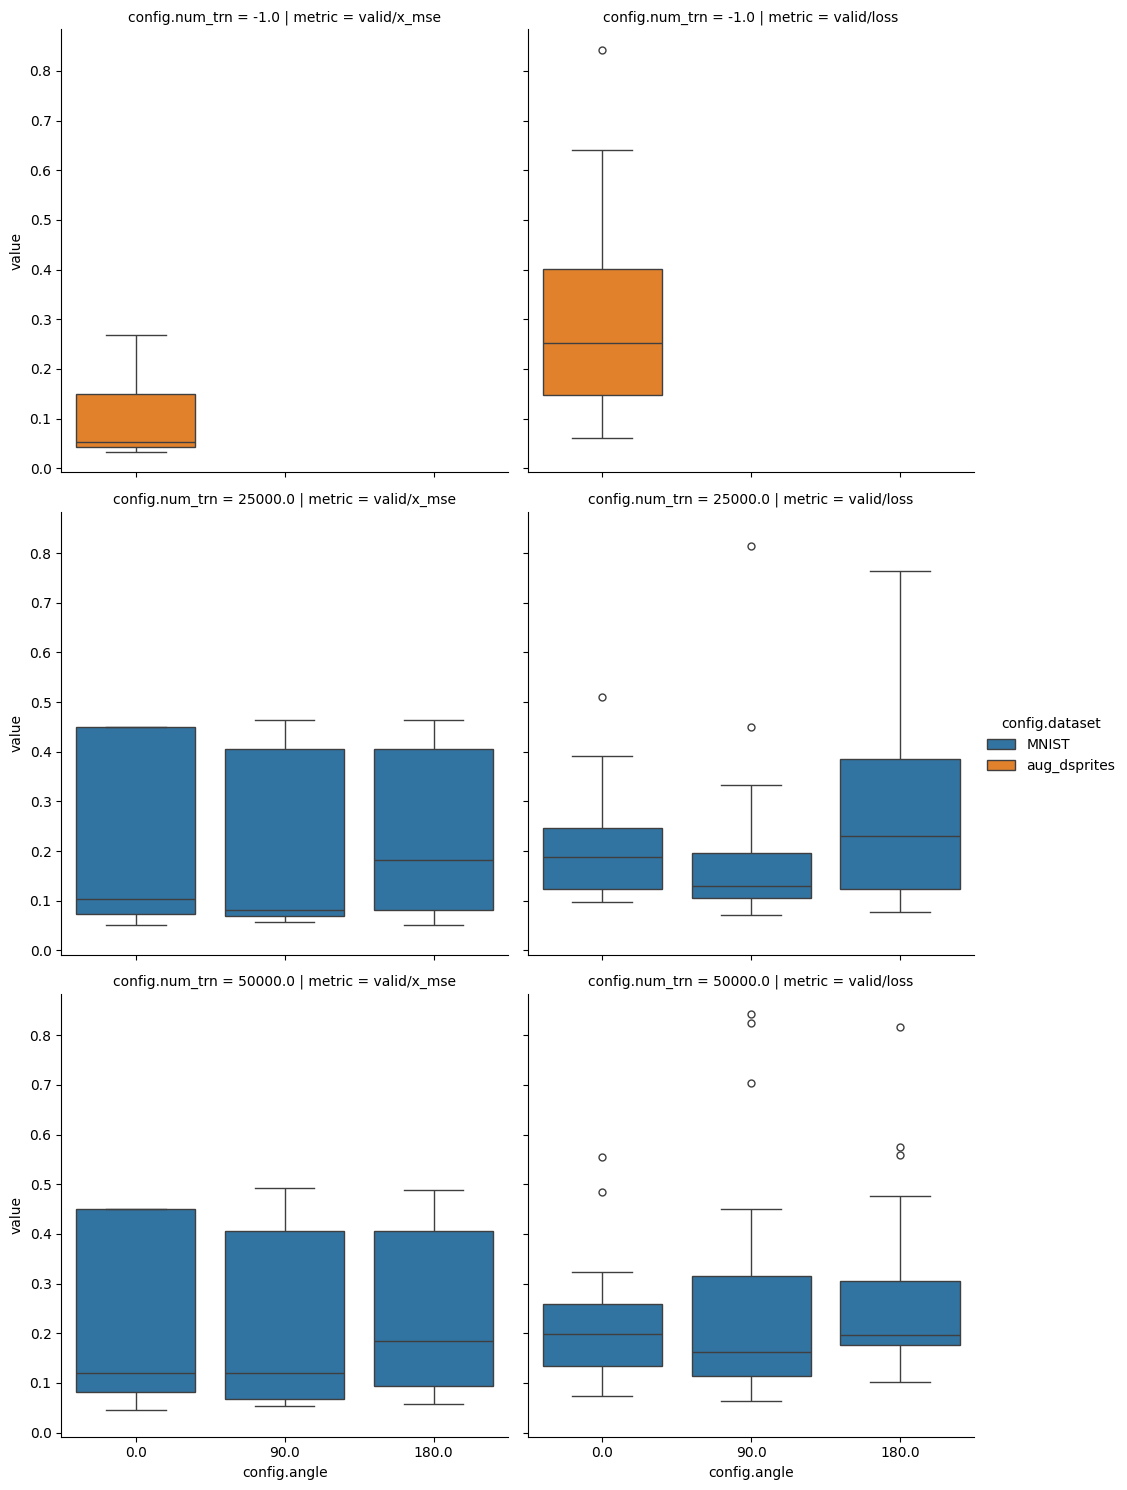

In [14]:
plot_df = df_filtered[[
    'summary.valid/x_mse', 'summary.valid/loss', 'config.angle',  'config.num_trn', 'config.dataset'
]]

# take only some settings
# plot_df = plot_df[
#     plot_df['config.init_lr'].isin([0.0003])
# ]

# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn', 'config.dataset'],
    value_vars=['summary.valid/x_mse', 'summary.valid/loss'],
    var_name='metric',
    value_name='value'
)

# remove the 'summary.' prefix from the metric names
plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')


sns.catplot(data=plot_df, x="config.angle", y="value", col="metric", row='config.num_trn', hue='config.dataset', kind="box", showfliers=True, sharey=True)

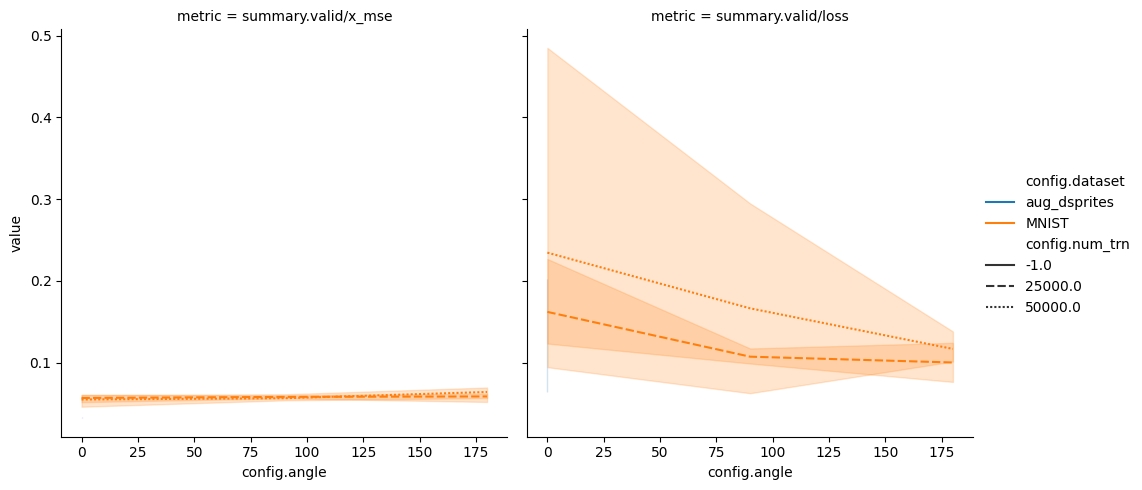

In [15]:
# take only the top 4 runs for each sweep
plot_df = df_filtered.groupby(
    'sweep').apply(
    lambda x: x.nsmallest(3, 'summary.valid/x_mse')).reset_index(drop=True)[[
    'summary.valid/x_mse', 'summary.valid/loss', 'config.angle', 'config.num_trn', 'config.dataset'
]]

# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn', 'config.dataset'],
    value_vars=['summary.valid/x_mse', 'summary.valid/loss'],
    var_name='metric',
    value_name='value'
)

# filter the plot df to only include results for config.num_trn == 25000
# plot_df = plot_df[plot_df['config.num_trn'] == 50000]

g = sns.relplot(data=plot_df, x="config.angle", y="value",  col="metric", style='config.num_trn', hue='config.dataset', kind='line', facet_kws={'sharey': True})

# g.set(xticks=[0, 15, 30, 60, 90, 120, 150, 180])

g

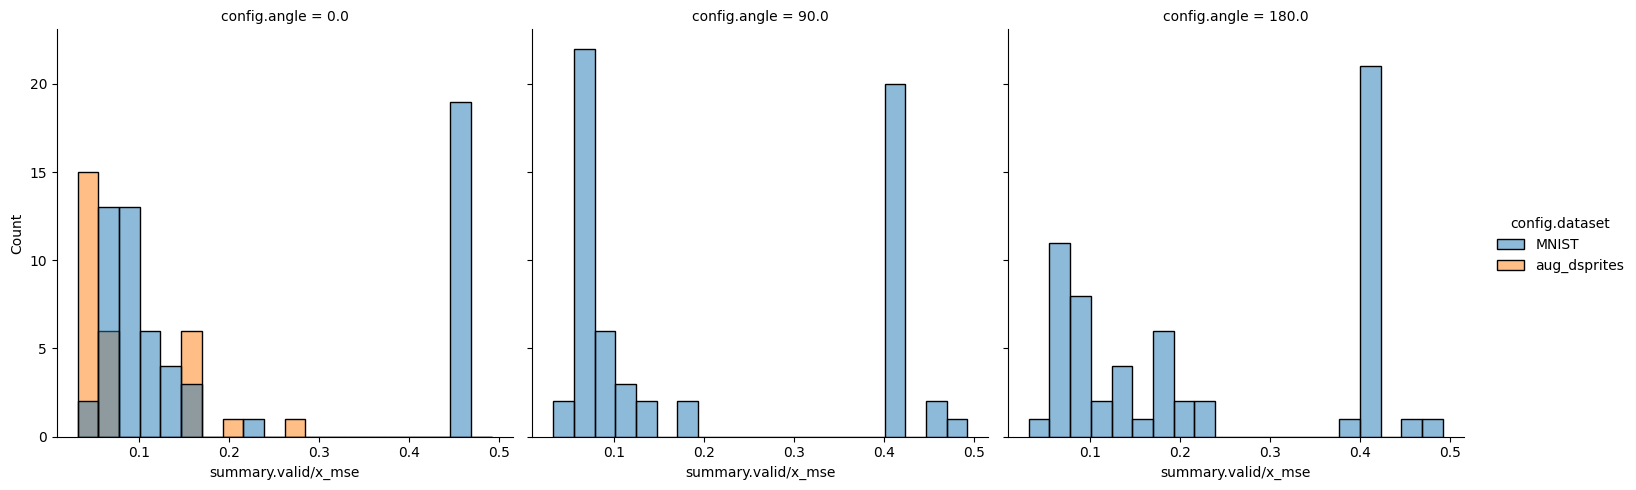

In [16]:
plot_df = df_filtered[[
    'summary.valid/x_mse', 'config.dataset', 'config.num_trn', 'config.angle'
]]

g = sns.displot(data=plot_df, x="summary.valid/x_mse", hue='config.dataset', col='config.angle', kind='hist', bins=20)

g

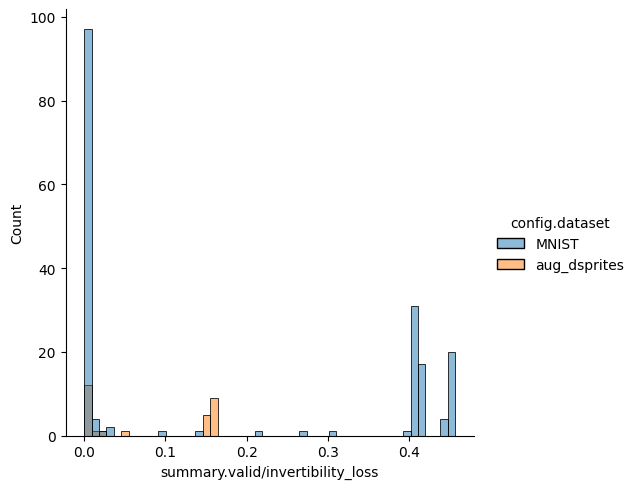

In [17]:
# plot the histograms of summary.valid/invertibility_loss for each dataset
plot_df = df_filtered[[
    'summary.valid/invertibility_loss', 'config.dataset'
]]

g = sns.displot(data=plot_df, x="summary.valid/invertibility_loss", hue='config.dataset', kind='hist', bins=50)

g

In [18]:
import numpy as np

In [19]:
# create a new dataframe with only the dsprites runs
inv_loss_df = df_filtered

# create a new column which indicates whether the invertability loss is greater than 0.1 for aug_dsprites or greater than 0.2 for mnist
inv_loss_df['bad_invertability_loss'] = inv_loss_df['summary.valid/invertibility_loss'].apply(lambda x: x > 0.1)

inv_loss_df.head()

/tmp/ipykernel_1999617/4222390368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_loss_df['bad_invertability_loss'] = inv_loss_df['summary.valid/invertibility_loss'].apply(lambda x: x > 0.1)


name tags        id     state                   sweep  \
0  visionary-sweep-32   []  hklfhifq   crashed  inf_rand_sweep_000_50k   
1       zany-sweep-31   []  1g9zw5co  finished  inf_rand_sweep_000_50k   
2   cerulean-sweep-30   []  ommtwakt  finished  inf_rand_sweep_000_50k   
3     desert-sweep-29   []  saq3odlg  finished  inf_rand_sweep_000_50k   
4  treasured-sweep-28   []  kqk2ujsh  finished  inf_rand_sweep_000_50k   

   summary.augment_bounds_mult  summary.valid/η_recon_loss  \
0                          1.0                         NaN   
1                          1.0                         NaN   
2                          1.0                    0.124279   
3                          1.0                    0.127894   
4                          1.0                         NaN   

   summary.valid/label_paired_image_mse  summary.lr_inf  summary.lr_σ  \
0                              0.501274    1.675685e-04      0.019171   
1                              0.484947    3.181959e-08      0.003333   
2                              0.432683    1.953124e-06      0.003333   
3                              0.442515    1.226929e-04      0.003333   
4                              0.484947    1.110580e-04      0.003333   

   summary.blur_sigma  summary.train/invertibility_loss  summary.σ  \
0            0.183773                          0.450290        NaN   
1            0.000000                          0.448992        NaN   
2            0.000000                          0.002341   0.000028   
3            0.000000                          0.002449   0.000023   
4            0.000000                          0.448992        NaN   

   summary._timestamp  summary.valid/loss  summary.train/x_mse  \
0        1.701198e+09                 NaN             0.448348   
1        1.701193e+09                 NaN             0.447859   
2        1.701192e+09            0.132280             0.089652   
3        1.701191e+09            0.220857             0.122531   
4        1.701191e+09                 NaN             0.447859   

   summary.valid/x_mse  summary._step  summary.grad_norm  summary.train/loss  \
0             0.450162         8715.0                NaN                 NaN   
1             0.450162        15000.0                NaN                 NaN   
2             0.090252        15000.0           0.609419            0.132264   
3             0.120361        30000.0           1.468331            0.228655   
4             0.450162        15000.0                NaN                 NaN   

   summary.train/η_recon_loss  summary.valid/invertibility_loss  \
0                         NaN                          0.452362   
1                         NaN                          0.452359   
2                    0.126002                          0.002307   
3                    0.135122                          0.002377   
4                         NaN                          0.452359   

   summary._runtime  summary._wandb.runtime  summary.inf_plots_1.height  \
0       5371.929259                     NaN                         NaN   
1       1199.742145                  1208.0                       300.0   
2        286.626208                   293.0                       300.0   
3        555.575969                   562.0                       300.0   
4       1131.343261                  1137.0                       300.0   

                          summary.inf_plots_1.sha256  \
0                                                NaN   
1  f1c6b4a4c7660ff556f29c07a4ef6ee48cefda7419d095...   
2  986c266d2d4878722e93ebcf2aa322e87ba6c8d49e51a8...   
3  d6529704aeef8521f79af1451db096c09ecacaa02d9a09...   
4  f1c6b4a4c7660ff556f29c07a4ef6ee48cefda7419d095...   

                            summary.inf_plots_1.path  \
0                                                NaN   
1  media/images/inf_plots_1_summary_f1c6b4a4c7660...   
2  media/images/inf_plots_1_summary_986c266d2d487...   
3  media/images/inf_plots_1_summary_d6529704ae

In [20]:
for col in inv_loss_df.columns:
    if inv_loss_df[col].dtype == bool:
        inv_loss_df[col] = inv_loss_df[col].astype(str)

inv_loss_df['config.steps'] = inv_loss_df['config.steps'].astype(str) + '_'
inv_loss_df['config.n_samples'] = inv_loss_df['config.n_samples'].astype(str) + '_'

/tmp/ipykernel_1999617/387221383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_loss_df[col] = inv_loss_df[col].astype(str)
/tmp/ipykernel_1999617/387221383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_loss_df[col] = inv_loss_df[col].astype(str)
/tmp/ipykernel_1999617/387221383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [21]:
# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
hyper_names = ['config.' + x for x in [
    'augment_warmup_steps_pct', 'blur_sigma_decay_end_pct', 'blur_sigma_init', 'clip_norm', 'difficulty_weighted_loss',
    'final_lr_mult', 'init_lr_mult', 'invertibility_loss_mult', 'lr', 'model.convnext_type', 'model.hidden_dims', 'model.model_type',
    'model.squash_to_bounds', 'n_samples', 'steps', 'symmetrised_samples_in_loss', 'warmup_steps_pct', 'weight_decay', 'η_loss_mult',
]]

inv_loss_df = inv_loss_df.melt(
    id_vars=['bad_invertability_loss'],
    value_vars=hyper_names[:],
    var_name='hyper',
    value_name='value'
)

In [22]:
def bin_if_numeric(x):
    try:
        x = pd.to_numeric(x, errors='raise')
        return pd.qcut(x, q=3, duplicates='drop')
    except ValueError as e:
        print(e)
        return x

inv_loss_df['value_bins'] = inv_loss_df.groupby('hyper')['value'].transform(bin_if_numeric)

Unable to parse string "True" at position 0
Unable to parse string "tiny" at position 0
Unable to parse string "512,256,256,128" at position 0
Unable to parse string "convnext" at position 0
Unable to parse string "True" at position 0
Unable to parse string "2_" at position 0
Unable to parse string "15000_" at position 0
Unable to parse string "True" at position 0


In [23]:
inv_loss_df.head()

bad_invertability_loss                            hyper     value  \
0                   True  config.augment_warmup_steps_pct  0.198955   
1                   True  config.augment_warmup_steps_pct  0.259506   
2                  False  config.augment_warmup_steps_pct  0.221502   
3                  False  config.augment_warmup_steps_pct   0.09326   
4                   True  config.augment_warmup_steps_pct  0.052357   

          value_bins  
0       (0.199, 0.3]  
1       (0.199, 0.3]  
2       (0.199, 0.3]  
3  (-0.00041, 0.103]  
4  (-0.00041, 0.103]

In [24]:
# (inv_loss_df['bad_invertability_loss_']).sum()/((1- inv_loss_df['bad_invertability_loss_']).sum() + (inv_loss_df['bad_invertability_loss_']).sum())
0.4311025673106627

0.4311025673106627

In [25]:
def calculate_ratio(df):
    # Assuming 'bad_invertability_loss' is the column that contains True or False
    counts = df['bad_invertability_loss'].value_counts()
    return counts.get("True", 0) / (counts.get("False", 1) + counts.get("True", 0)), (counts.get("False", 1) + counts.get("True", 0))

ratio_df = inv_loss_df.groupby(['hyper', 'value_bins']).apply(calculate_ratio).reset_index()
ratio_df.columns = ['hyper', 'value_bins', 'ratio']

# split ratio column into two: ratio and N
ratio_df[['ratio', 'N']] = pd.DataFrame(ratio_df['ratio'].tolist(), index=ratio_df.index)

ratio_df

hyper                      value_bins  \
0      config.augment_warmup_steps_pct               (-0.00041, 0.103]   
1      config.augment_warmup_steps_pct                  (0.103, 0.199]   
2      config.augment_warmup_steps_pct                    (0.199, 0.3]   
3      config.blur_sigma_decay_end_pct  (0.0010799999999999998, 0.389]   
4      config.blur_sigma_decay_end_pct                  (0.389, 0.714]   
5      config.blur_sigma_decay_end_pct                    (0.714, 1.0]   
6               config.blur_sigma_init    (0.011200000000000002, 0.75]   
7               config.blur_sigma_init                   (0.75, 1.424]   
8               config.blur_sigma_init                  (1.424, 1.998]   
9                     config.clip_norm     (1.0030000000000001, 3.575]   
10                    config.clip_norm                 (3.575, 11.959]   
11                    config.clip_norm                (11.959, 49.604]   
12     config.difficulty_weighted_loss                           False   
13     config.difficulty_weighted_loss                            True   
14                config.final_lr_mult            (-0.000898, 0.00401]   
15                config.final_lr_mult               (0.00401, 0.0655]   
16                config.final_lr_mult                 (0.0655, 0.906]   
17                 config.init_lr_mult  (0.009500000000000001, 0.0456]   
18                 config.init_lr_mult                  (0.0456, 0.18]   
19                 config.init_lr_mult                   (0.18, 0.984]   
20      config.invertibility_loss_mult  (0.0003699999999999999, 0.303]   
21      config.invertibility_loss_mult                  (0.303, 0.649]   
22      config.invertibility_loss_mult                    (0.649, 1.0]   
23                           config.lr           (-0.000896, 0.000411]   
24                           config.lr             (0.000411, 0.00273]   
25                           config.lr               (0.00273, 0.0098]   
26          config.model.convnext_type                            atto   
27          config.model.convnext_type                            pico   
28          config.model.convnext_type                            tiny   
29            config.model.hidden_dims                1024,512,256,128   
30            config.model.hidden_dims               4096,2048,512,128   
31            config.model.hidden_dims                 512,256,256,128   
32             config.model.model_type                        convnext   
33             config.model.model_type                             mlp   
34       config.model.squash_to_bounds                           False   
35       config.model.squash_to_bounds                            True   
36                    config.n_samples                              2_   
37                    config.n_samples                              3_   
38                    config.n_samples                              5_   
39                        config.steps                          15000_   
40                        config.steps                          30000_   
41                        config.steps                          60000_   
42  config.symmetrised_samples_in_loss                           False   
43  config.symmetrised_samples_in_loss                            True   
44             config.warmup_steps_pct  (0.0014199999999999998, 0.106]   
45             config.warmup_steps_pct                  (0.106, 0.193]   
46             config.warmup_steps_pct                    (0.193, 0.3]   
47                 config.weight_decay          (-0.0009899, 4.79e-05]   
48                 config.weight_decay            (4.79e-05, 0.000213]   
49                 config.weight_decay            (0.000213, 0.000965]   
50                  config.η_loss_mult                (0.00671, 0.337]   
51                  config.η_loss_mult                  (0.337, 0.676]   
52                  config.η_loss_mult                  (0.676, 0.995]   

       ratio    N  
0   0.352113   7

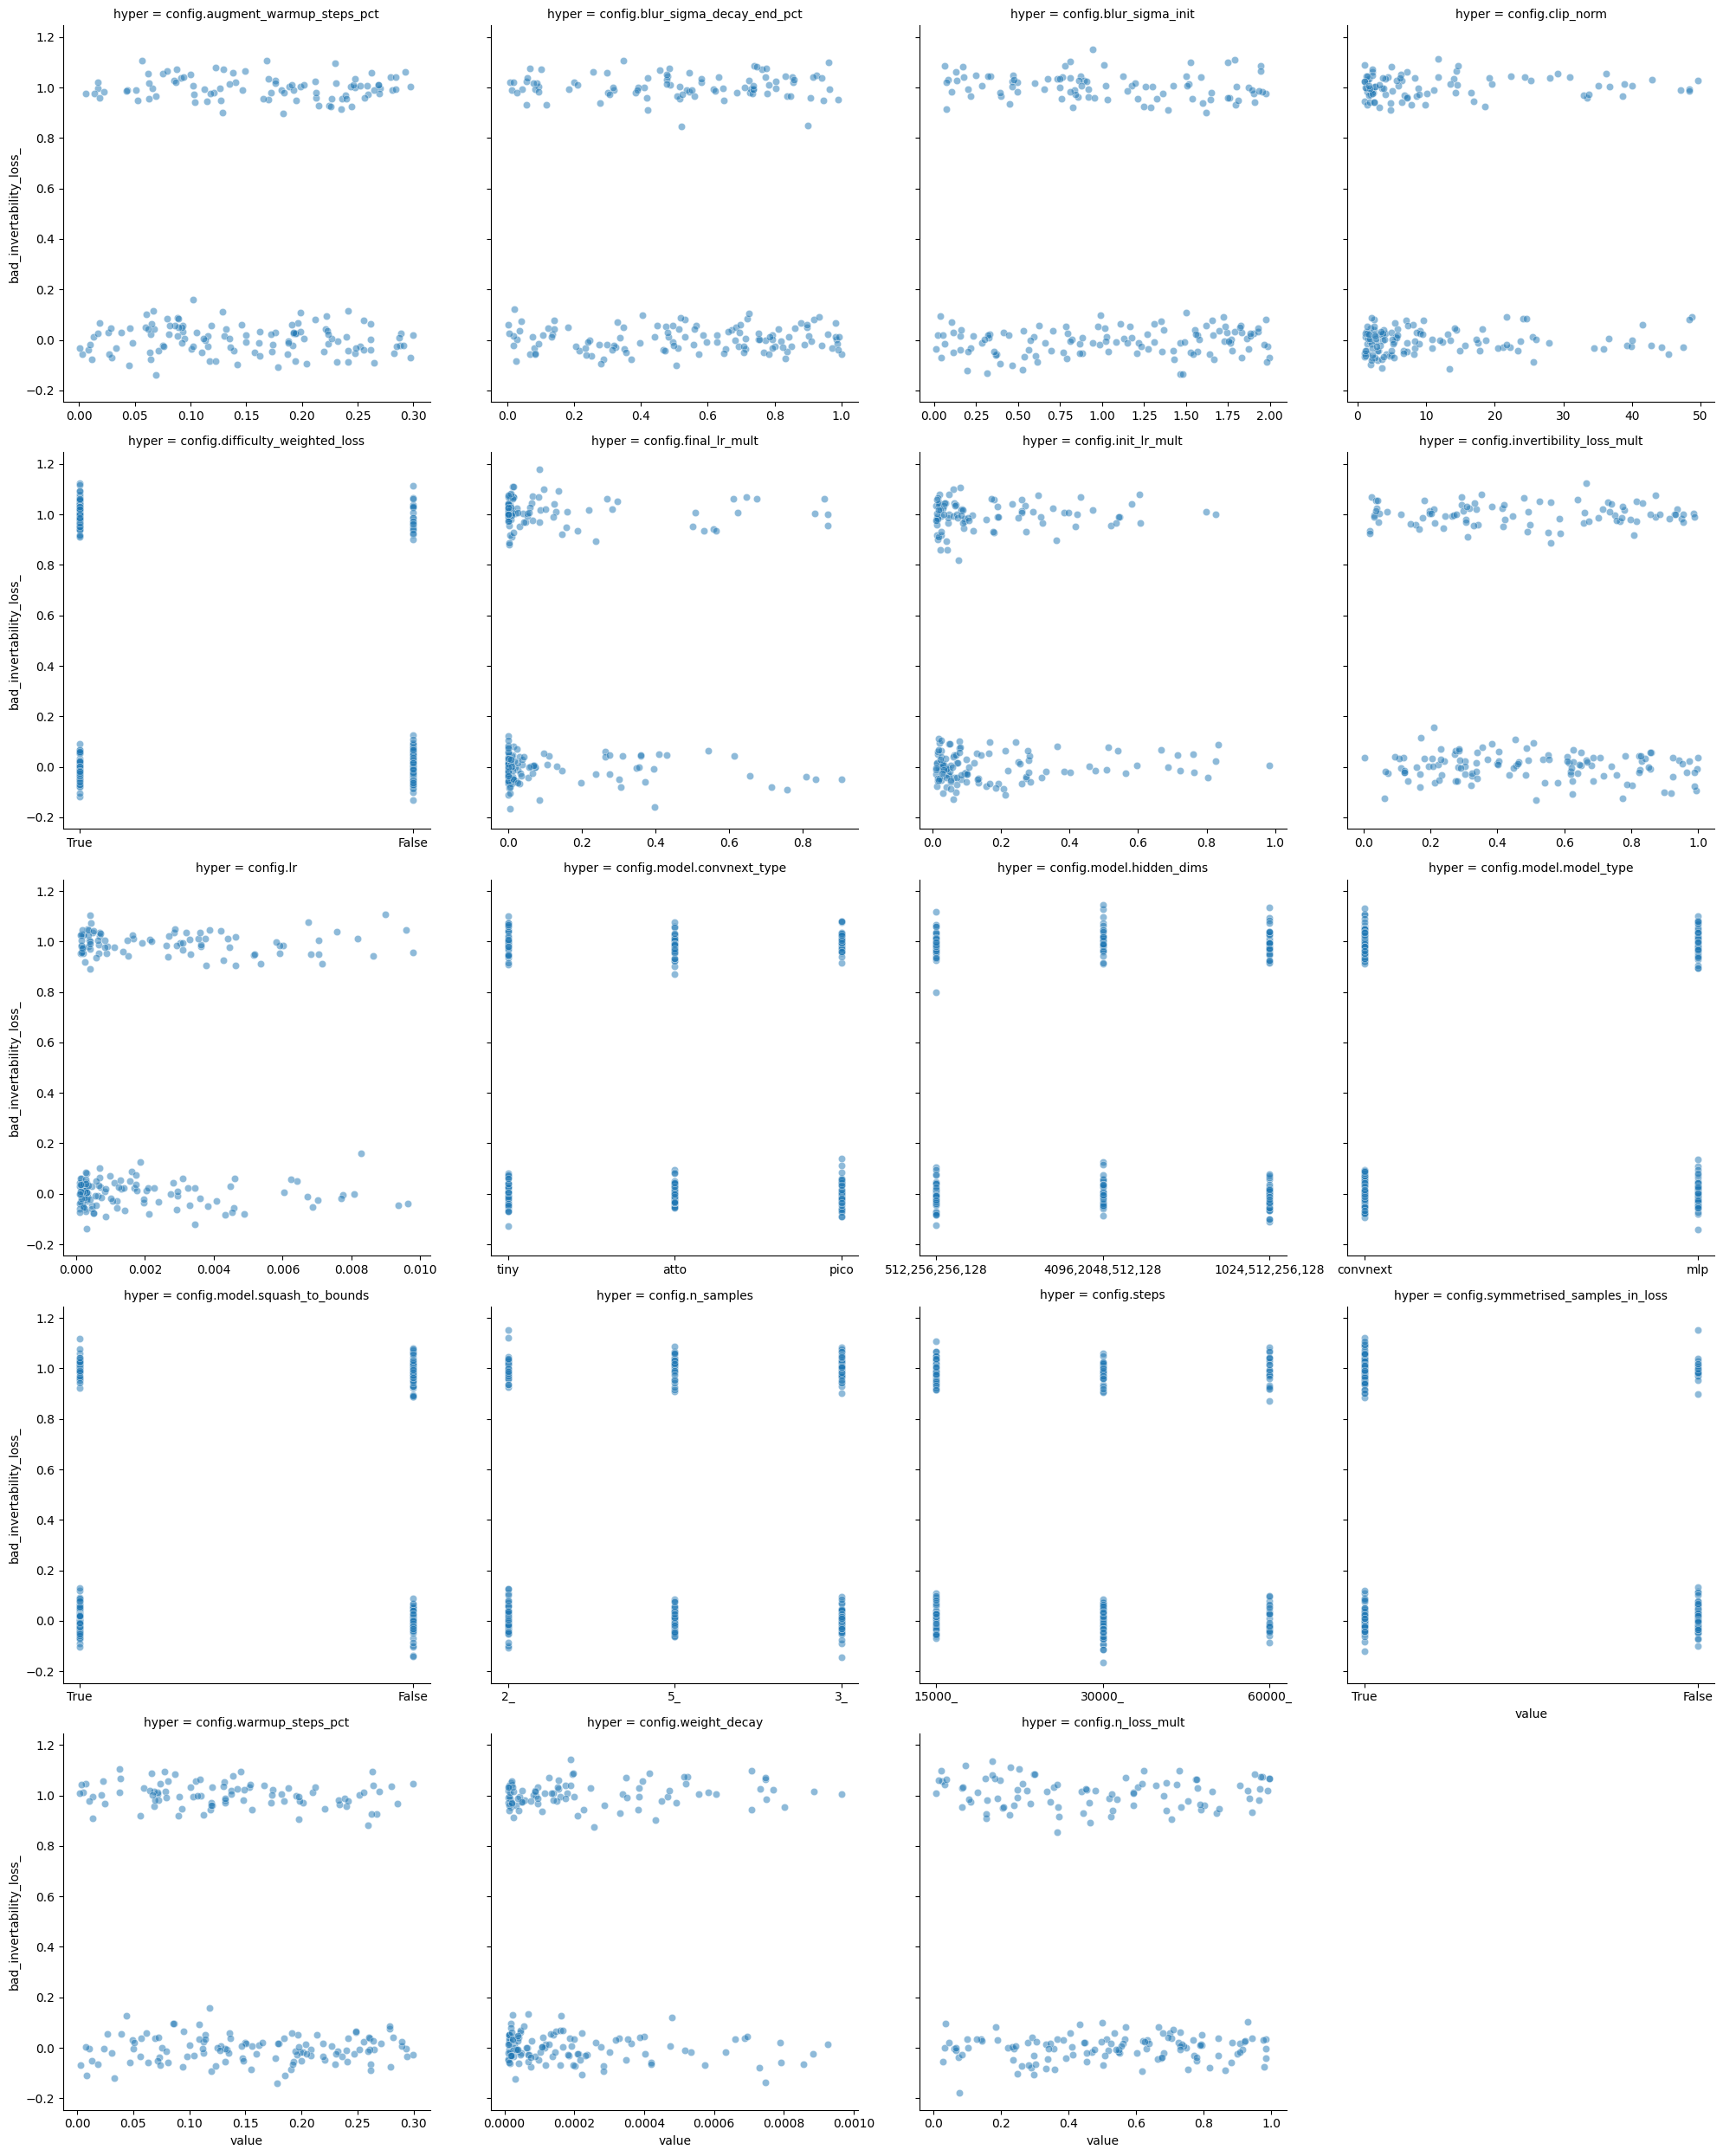

In [26]:
# add some jitter to bad_invertability_loss
inv_loss_df['bad_invertability_loss_'] = inv_loss_df['bad_invertability_loss'].apply(lambda x: float(x == 'True') + np.random.normal(0, 0.05))

g = sns.relplot(
    data=inv_loss_df,
    y="bad_invertability_loss_",
    x="value",
    col="hyper",
    col_wrap=4,
    # sharex=False, sharey=True,
    facet_kws={'sharex': False, 'sharey': True},
    alpha=0.5,
)

# g.set(xscale="log")

g

## Analize sweeps

In [27]:
df_filtered

name tags        id     state                    sweep  \
0    visionary-sweep-32   []  hklfhifq   crashed   inf_rand_sweep_000_50k   
1         zany-sweep-31   []  1g9zw5co  finished   inf_rand_sweep_000_50k   
2     cerulean-sweep-30   []  ommtwakt  finished   inf_rand_sweep_000_50k   
3       desert-sweep-29   []  saq3odlg  finished   inf_rand_sweep_000_50k   
4    treasured-sweep-28   []  kqk2ujsh  finished   inf_rand_sweep_000_50k   
..                  ...  ...       ...       ...                      ...   
217      sweepy-sweep-9   []  1lbw4koh   crashed  inf_rand_dsprites_sweep   
218     worldly-sweep-8   []  cspy5777   crashed  inf_rand_dsprites_sweep   
219   chocolate-sweep-7   []  iiatew3w   crashed  inf_rand_dsprites_sweep   
220        glad-sweep-6   []  nswojhda  finished  inf_rand_dsprites_sweep   
221        deep-sweep-5   []  fxro2f40  finished  inf_rand_dsprites_sweep   

     summary.augment_bounds_mult  summary.valid/η_recon_loss  \
0                       1.000000                         NaN   
1                       1.000000                         NaN   
2                       1.000000                    0.124279   
3                       1.000000                    0.127894   
4                       1.000000                         NaN   
..                           ...                         ...   
217                     0.681216                    0.413400   
218                     1.000000                    0.525189   
219                     1.000000                    0.634611   
220                     1.000000                    0.397064   
221                     1.000000                    0.468517   

     summary.valid/label_paired_image_mse  summary.lr_inf  summary.lr_σ  \
0                                0.501274    1.675685e-04      0.019171   
1                                0.484947    3.181959e-08      0.003333   
2                                0.432683    1.953124e-06      0.003333   
3                                0.442515    1.226929e-04      0.003333   
4                                0.484947    1.110580e-04      0.003333   
..                                    ...             ...           ...   
217                              0.054866    9.086736e-05      0.025931   
218                              0.126313    2.775312e-03      0.008653   
219                              0.171510    5.390415e-04      0.027733   
220                              0.054872    7.189680e-05      0.003333   
221                              0.042796    4.758536e-05      0.003333   

     summary.blur_sigma  summary.train/invertibility_loss  summary.σ  \
0              0.183773                          0.450290        NaN   
1              0.000000                          0.448992        NaN   
2              0.000000                          0.002341   0.000028   
3              0.000000                          0.002449   0.000023   
4              0.000000                          0.448992        NaN   
..                  ...                               ...        ...   
217            0.252818                          0.000194   0.000315   
218            0.000000                          0.003448   0.001797   
219            0.542206                          0.002952   0.012927   
220            0.000000                          0.003224   0.000058   
221            0.000000                          0.002879   0.000006   

     summary._timestamp  summary.valid/loss  summary.train/x_mse  \
0          1.701198e+09                 NaN             0.448348   
1          1.701193e+09                 NaN             0.447859   
2          1.701192e+09            0.132280             0.089652   
3          1.701191e+09            0.220857             0.122531   
4          1.701191e+09                 NaN             0.447859   
..                  ...                 ...                  ...   
217        1.701213e+09            0.422931             0.048768   
218        1.70

In [28]:
# filter out failed runs, i.e., for config.dataset == MNIST those with x_mse > 0.3, and for config.dataset == aug_dsprites those with x_mse > 0.1
mnist_condition = (df_filtered['config.dataset'] == 'MNIST') & (df_filtered['summary.valid/x_mse'] < 0.3)
aug_dsprites_condition = (df_filtered['config.dataset'] == 'aug_dsprites') & (df_filtered['summary.valid/x_mse'] < 0.1)
df_filtered_ = df_filtered[mnist_condition | aug_dsprites_condition]

df_filtered_

name tags        id     state                    sweep  \
2    cerulean-sweep-30   []  ommtwakt  finished   inf_rand_sweep_000_50k   
3      desert-sweep-29   []  saq3odlg  finished   inf_rand_sweep_000_50k   
5        dark-sweep-27   []  twzx00yo   crashed   inf_rand_sweep_000_50k   
6      toasty-sweep-26   []  dvdc9ydd   crashed   inf_rand_sweep_000_50k   
7      likely-sweep-25   []  ceke39yc   crashed   inf_rand_sweep_000_50k   
..                 ...  ...       ...       ...                      ...   
215       easy-sweep-7   []  mef37ga4  finished  inf_rand_dsprites_sweep   
216       glad-sweep-6   []  adlb613y  finished  inf_rand_dsprites_sweep   
217     sweepy-sweep-9   []  1lbw4koh   crashed  inf_rand_dsprites_sweep   
220       glad-sweep-6   []  nswojhda  finished  inf_rand_dsprites_sweep   
221       deep-sweep-5   []  fxro2f40  finished  inf_rand_dsprites_sweep   

     summary.augment_bounds_mult  summary.valid/η_recon_loss  \
2                       1.000000                    0.124279   
3                       1.000000                    0.127894   
5                       1.000000                    0.103444   
6                       1.000000                    0.166158   
7                       1.000000                    0.114080   
..                           ...                         ...   
215                     1.000000                    0.362883   
216                     1.000000                    0.375558   
217                     0.681216                    0.413400   
220                     1.000000                    0.397064   
221                     1.000000                    0.468517   

     summary.valid/label_paired_image_mse  summary.lr_inf  summary.lr_σ  \
2                                0.432683    1.953124e-06      0.003333   
3                                0.442515    1.226929e-04      0.003333   
5                                0.402251    3.278820e-05      0.005250   
6                                0.410817    2.976283e-04      0.027535   
7                                0.455877    2.114841e-03      0.024892   
..                                    ...             ...           ...   
215                              0.046041    7.070365e-05      0.003333   
216                              0.049776    4.819657e-08      0.003333   
217                              0.054866    9.086736e-05      0.025931   
220                              0.054872    7.189680e-05      0.003333   
221                              0.042796    4.758536e-05      0.003333   

     summary.blur_sigma  summary.train/invertibility_loss  summary.σ  \
2              0.000000                          0.002341   0.000028   
3              0.000000                          0.002449   0.000023   
5              0.000000                          0.003766   0.000004   
6              1.019122                          0.002537   0.000047   
7              0.864805                          0.166785   0.000006   
..                  ...                               ...        ...   
215            0.000000                          0.002777   0.000007   
216            0.000000                          0.003412   0.000066   
217            0.252818                          0.000194   0.000315   
220            0.000000                          0.003224   0.000058   
221            0.000000                          0.002879   0.000006   

     summary._timestamp  summary.valid/loss  summary.train/x_mse  \
2          1.701192e+09            0.132280             0.089652   
3          1.701191e+09            0.220857             0.122531   
5          1.701189e+09            0.134049             0.068764   
6          1.701184e+09            0.287402             0.044793   
7          1.701178e+09            0.256142             0.027507   
..                  ...                 ...                  ...   
215        1.701217e+09            0.148600             0.038738   
216        1.701216e+09   

In [29]:
# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
hyper_names = ['config.' + x for x in [
    'augment_warmup_steps_pct', 'blur_sigma_decay_end_pct', 'blur_sigma_init', 'clip_norm', 'difficulty_weighted_loss',
    'final_lr_mult', 'init_lr_mult', 'invertibility_loss_mult', 'lr', 'model.convnext_type', 'model.hidden_dims', 'model.model_type',
    'model.squash_to_bounds', 'n_samples', 'steps', 'symmetrised_samples_in_loss', 'warmup_steps_pct', 'weight_decay', 'η_loss_mult',
]]

df = df_filtered_.melt(
    id_vars=['config.angle', 'config.num_trn', 'config.dataset'] + hyper_names,
    value_vars=['summary.valid/x_mse', 'summary.valid/loss', 'summary.valid/label_paired_image_mse'],
    var_name='metric',
    value_name='value'
)

df

config.angle  config.num_trn config.dataset  \
0             0.0         50000.0          MNIST   
1             0.0         50000.0          MNIST   
2             0.0         50000.0          MNIST   
3             0.0         50000.0          MNIST   
4             0.0         50000.0          MNIST   
..            ...             ...            ...   
406           0.0            -1.0   aug_dsprites   
407           0.0            -1.0   aug_dsprites   
408           0.0            -1.0   aug_dsprites   
409           0.0            -1.0   aug_dsprites   
410           0.0            -1.0   aug_dsprites   

     config.augment_warmup_steps_pct  config.blur_sigma_decay_end_pct  \
0                           0.221502                         0.441199   
1                           0.093260                         0.848842   
2                           0.048061                         0.251865   
3                           0.080105                         0.682928   
4                           0.075342                         0.925631   
..                               ...                              ...   
406                         0.190722                         0.889672   
407                         0.092488                         0.697542   
408                         0.132068                         0.313316   
409                         0.075831                         0.897705   
410                         0.248006                         0.713009   

     config.blur_sigma_init  config.clip_norm config.difficulty_weighted_loss  \
0                  1.502990          2.429090                           False   
1                  1.828954          4.169132                           False   
2                  1.464664          7.151004                           False   
3                  1.902845          8.103629                           False   
4                  1.289835          6.850490                           False   
..                      ...               ...                             ...   
406                0.102977         17.863132                            True   
407                0.368092         14.202790                            True   
408                0.354655          9.489060                           False   
409                1.559705          2.225665                           False   
410                0.529676         23.740026                           False   

     config.final_lr_mult  config.init_lr_mult  \
0                0.001635             0.243429   
1                0.398689             0.190917   
2                0.001291             0.024067   
3                0.263123             0.249208   
4                0.005220             0.017673   
..                    ...                  ...   
406              0.057502             0.079310   
407              0.000119             0.084132   
408              0.007370             0.100511   
409              0.131393             0.022906   
410              0.027324             0.061310   

     config.invertibility_loss_mult  config.lr config.model.convnext_type  \
0                          0.302509   0.001194                       atto   
1                          0.825868   0.000308                       pico   
2                          0.283303   0.000449                       atto   
3                          0.640009   0.000319                       pico   
4                          0.730545   0.002613                       pico   
..                              ...        ...                        ...   
406                        0.782185   0.001230                       atto   
407                        0.540594   0.000404                       pico   
408                        0.507151   0.000111                       tiny   
409                        0.120364   0.000547                       pico   
410                        0.999770   0.001742                       pico   

    

In [30]:
# calculate the means for symmetrised_samples_in_loss is True and False
mean_df = df[(df.metric == 'summary.valid/x_mse')].groupby('config.symmetrised_samples_in_loss')['value'].mean()

# determine which setting of symmetrised_samples_in_loss has the higher mean
symmetrised_samples_in_loss_setting = mean_df.idxmax()
# determine the differnece in means
symmetrised_samples_in_loss_diff = mean_df.max() - mean_df.min()

# remove the difference from the setting with the higher mean
cond = (df.metric == 'summary.valid/x_mse') & (df['config.symmetrised_samples_in_loss'] == symmetrised_samples_in_loss_setting)
df[cond]['value'] = df[cond]['value'] - symmetrised_samples_in_loss_diff

df

/tmp/ipykernel_1999617/1331129572.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cond]['value'] = df[cond]['value'] - symmetrised_samples_in_loss_diff


config.angle  config.num_trn config.dataset  \
0             0.0         50000.0          MNIST   
1             0.0         50000.0          MNIST   
2             0.0         50000.0          MNIST   
3             0.0         50000.0          MNIST   
4             0.0         50000.0          MNIST   
..            ...             ...            ...   
406           0.0            -1.0   aug_dsprites   
407           0.0            -1.0   aug_dsprites   
408           0.0            -1.0   aug_dsprites   
409           0.0            -1.0   aug_dsprites   
410           0.0            -1.0   aug_dsprites   

     config.augment_warmup_steps_pct  config.blur_sigma_decay_end_pct  \
0                           0.221502                         0.441199   
1                           0.093260                         0.848842   
2                           0.048061                         0.251865   
3                           0.080105                         0.682928   
4                           0.075342                         0.925631   
..                               ...                              ...   
406                         0.190722                         0.889672   
407                         0.092488                         0.697542   
408                         0.132068                         0.313316   
409                         0.075831                         0.897705   
410                         0.248006                         0.713009   

     config.blur_sigma_init  config.clip_norm config.difficulty_weighted_loss  \
0                  1.502990          2.429090                           False   
1                  1.828954          4.169132                           False   
2                  1.464664          7.151004                           False   
3                  1.902845          8.103629                           False   
4                  1.289835          6.850490                           False   
..                      ...               ...                             ...   
406                0.102977         17.863132                            True   
407                0.368092         14.202790                            True   
408                0.354655          9.489060                           False   
409                1.559705          2.225665                           False   
410                0.529676         23.740026                           False   

     config.final_lr_mult  config.init_lr_mult  \
0                0.001635             0.243429   
1                0.398689             0.190917   
2                0.001291             0.024067   
3                0.263123             0.249208   
4                0.005220             0.017673   
..                    ...                  ...   
406              0.057502             0.079310   
407              0.000119             0.084132   
408              0.007370             0.100511   
409              0.131393             0.022906   
410              0.027324             0.061310   

     config.invertibility_loss_mult  config.lr config.model.convnext_type  \
0                          0.302509   0.001194                       atto   
1                          0.825868   0.000308                       pico   
2                          0.283303   0.000449                       atto   
3                          0.640009   0.000319                       pico   
4                          0.730545   0.002613                       pico   
..                              ...        ...                        ...   
406                        0.782185   0.001230                       atto   
407                        0.540594   0.000404                       pico   
408                        0.507151   0.000111                       tiny   
409                        0.120364   0.000547                       pico   
410                        0.999770   0.001742                       pico   

    

In [31]:
# take only MNIST runs
# df = df[df['config.dataset'] == 'MNIST']

In [32]:
METRIC = 'summary.valid/x_mse'
# METRIC = 'summary.valid/label_paired_image_mse'

### augment_warmup_steps_pct

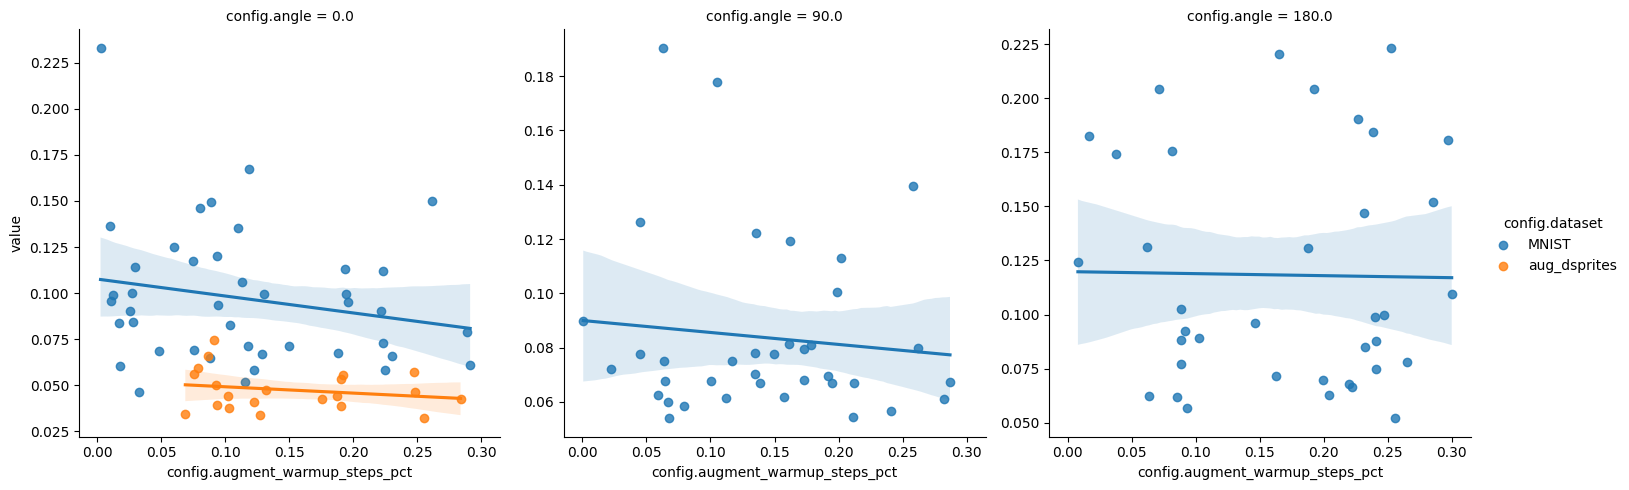

In [33]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.augment_warmup_steps_pct",
    y="value",
    col='config.angle', hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

# g.set(xscale="log")

g

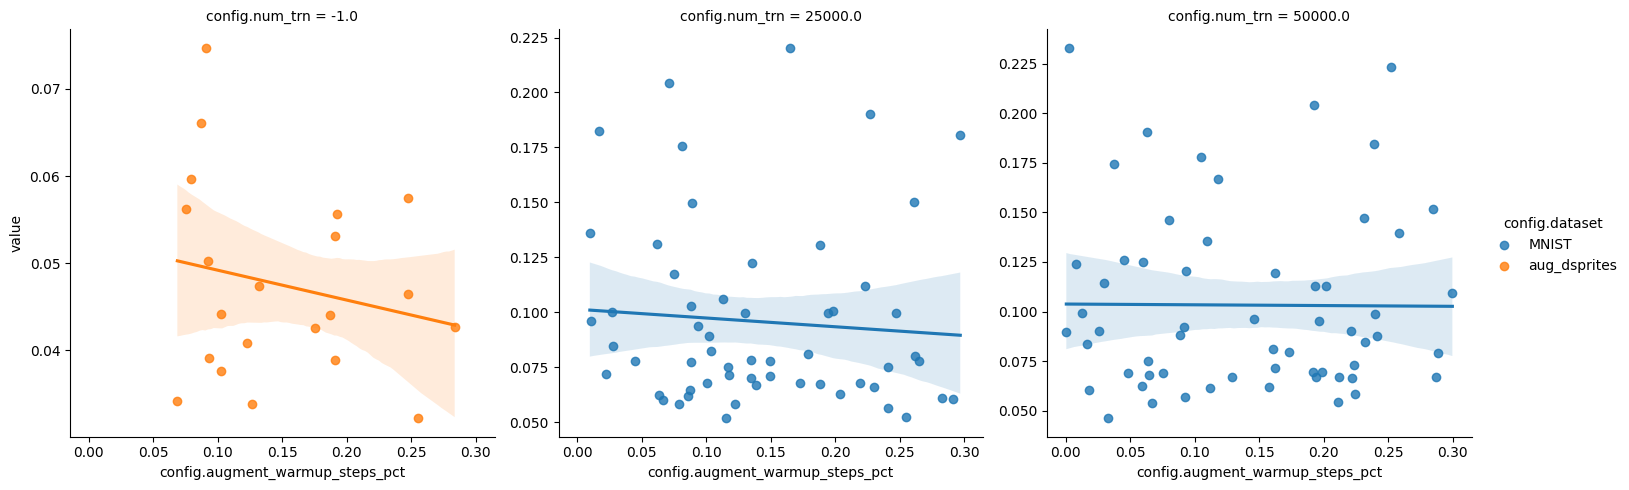

In [34]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.augment_warmup_steps_pct",
    y="value",
    col='config.num_trn', hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

# g.set(xscale="log")

g

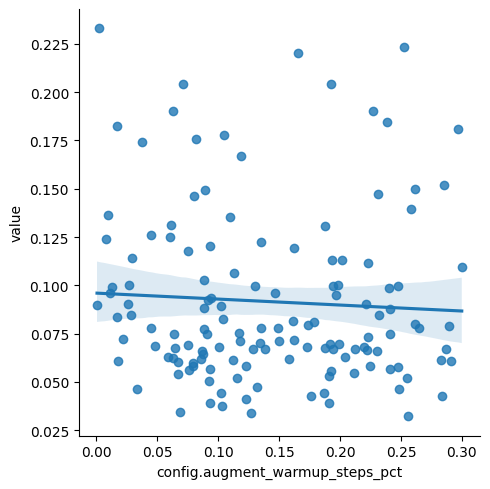

In [35]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.augment_warmup_steps_pct",
    y="value",
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

# g.set(xscale="log")

g

### blur_sigma_decay_end_pct

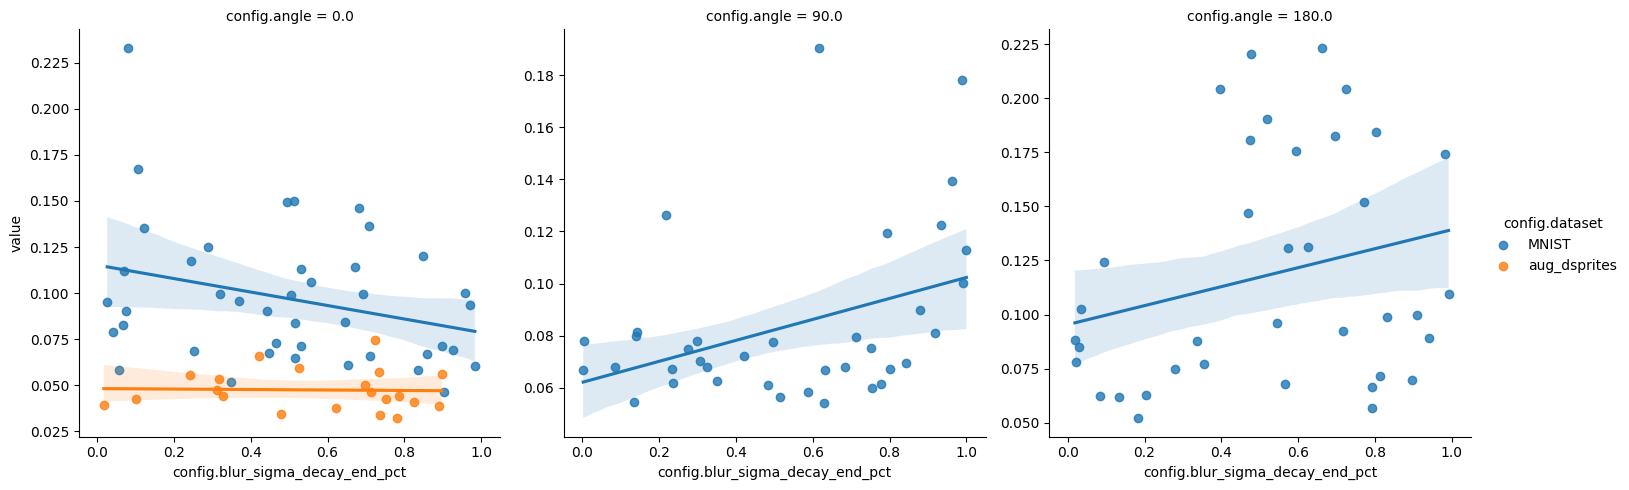

In [36]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.blur_sigma_decay_end_pct",
    y="value",
    col="config.angle", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

# g.set(xscale="log")

g

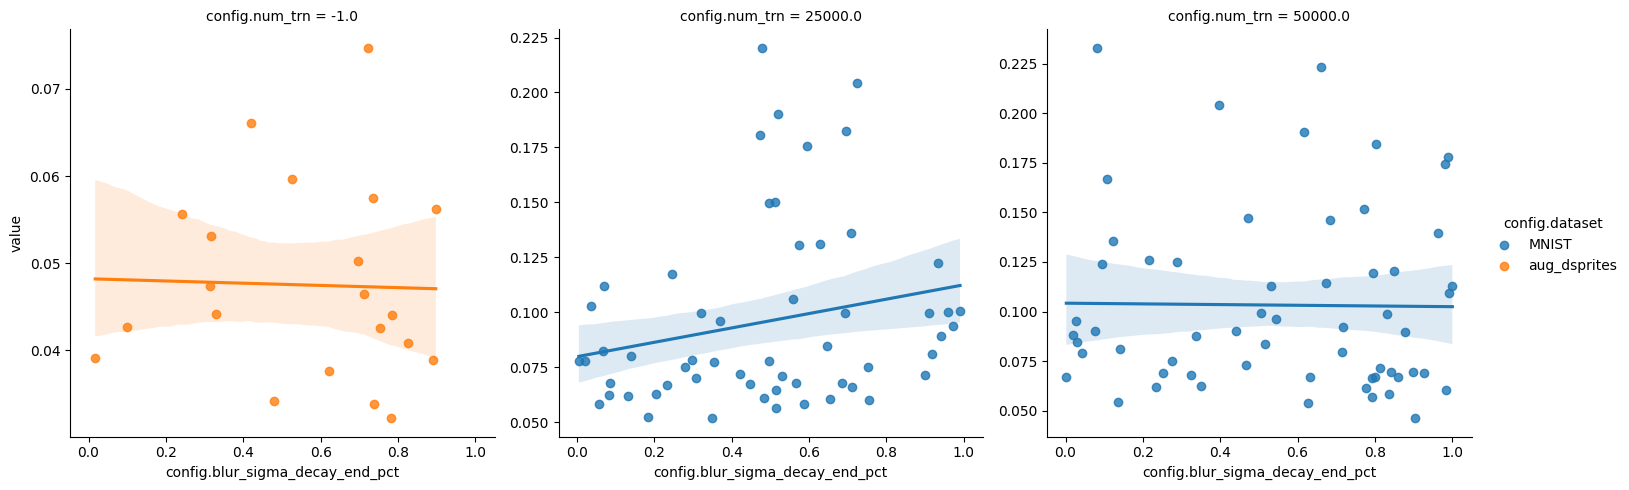

In [37]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.blur_sigma_decay_end_pct",
    y="value",
    col="config.num_trn", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

# g.set(xscale="log")

g

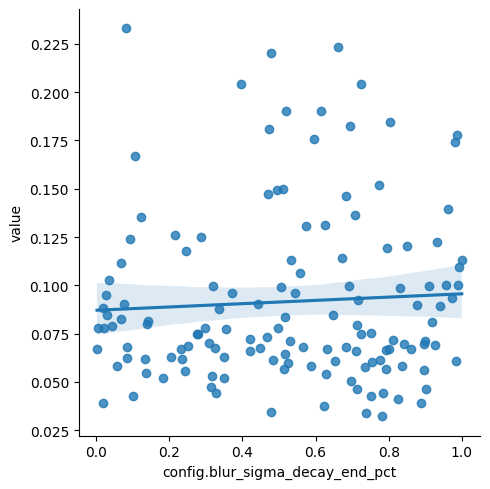

In [38]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.blur_sigma_decay_end_pct",
    y="value",
    # hue='config.dataset', col='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

# g.set(xscale="log")

g

### blur_sigma_init

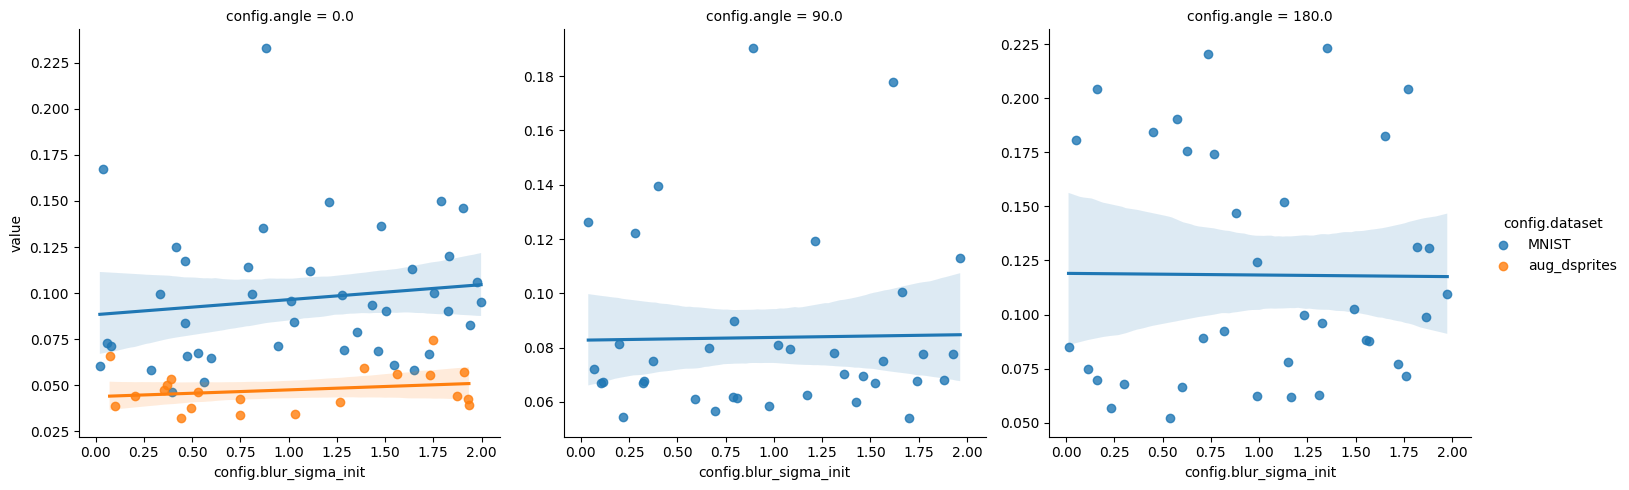

In [39]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.blur_sigma_init",
    y="value",
    col="config.angle", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

# g.set(xscale="log")

g

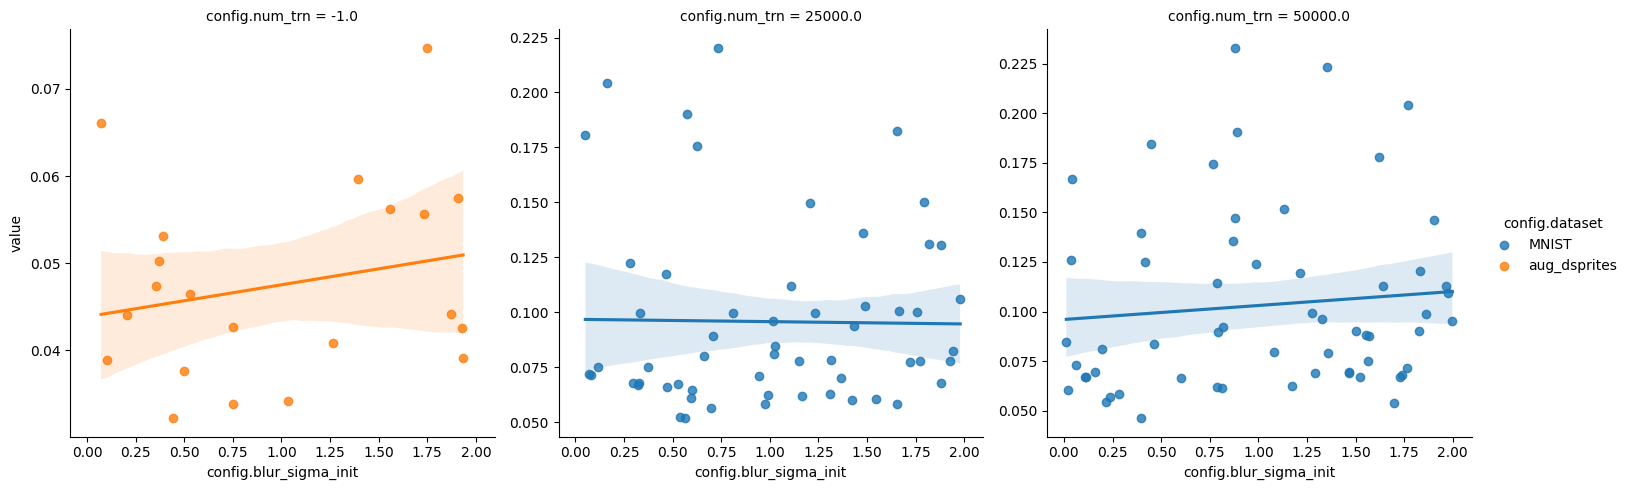

In [40]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.blur_sigma_init",
    y="value",
    col="config.num_trn", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

# g.set(xscale="log")

g

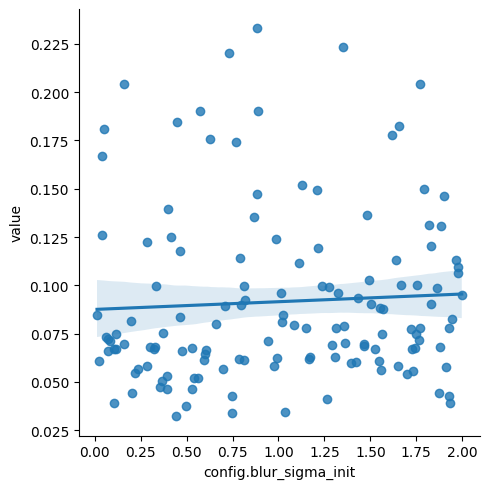

In [41]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.blur_sigma_init",
    y="value",
    # hue='config.dataset', col='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

# g.set(xscale="log")

g

### clip_norm

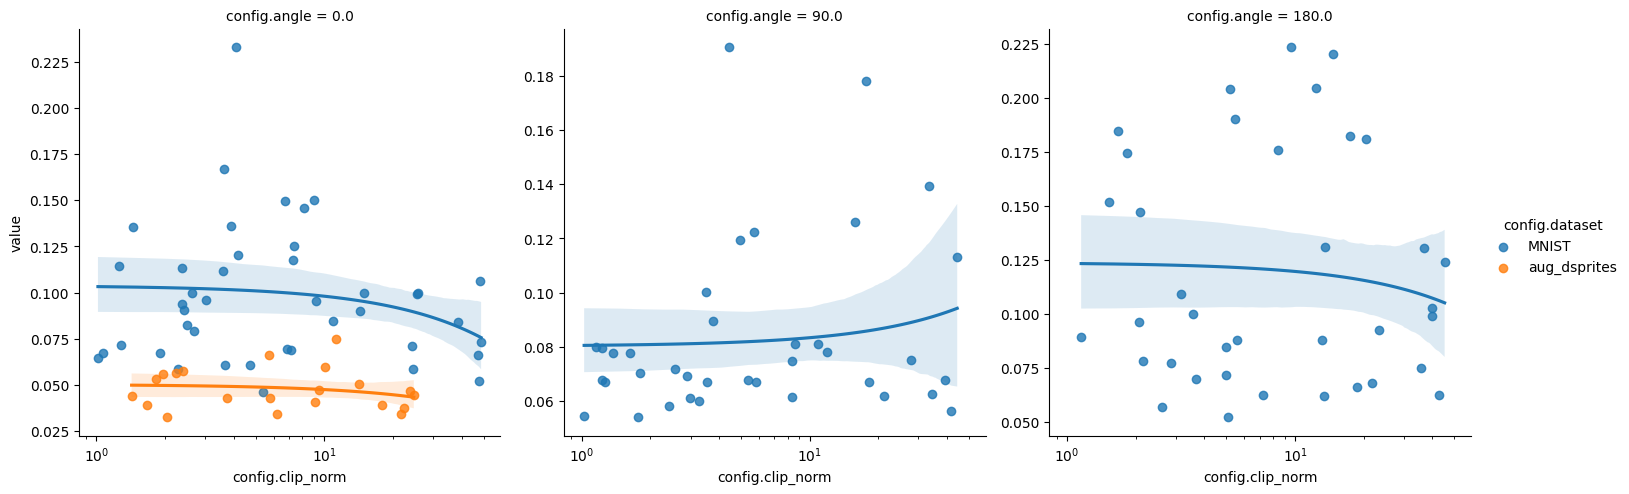

In [42]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.clip_norm",
    y="value",
    col="config.angle",  hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

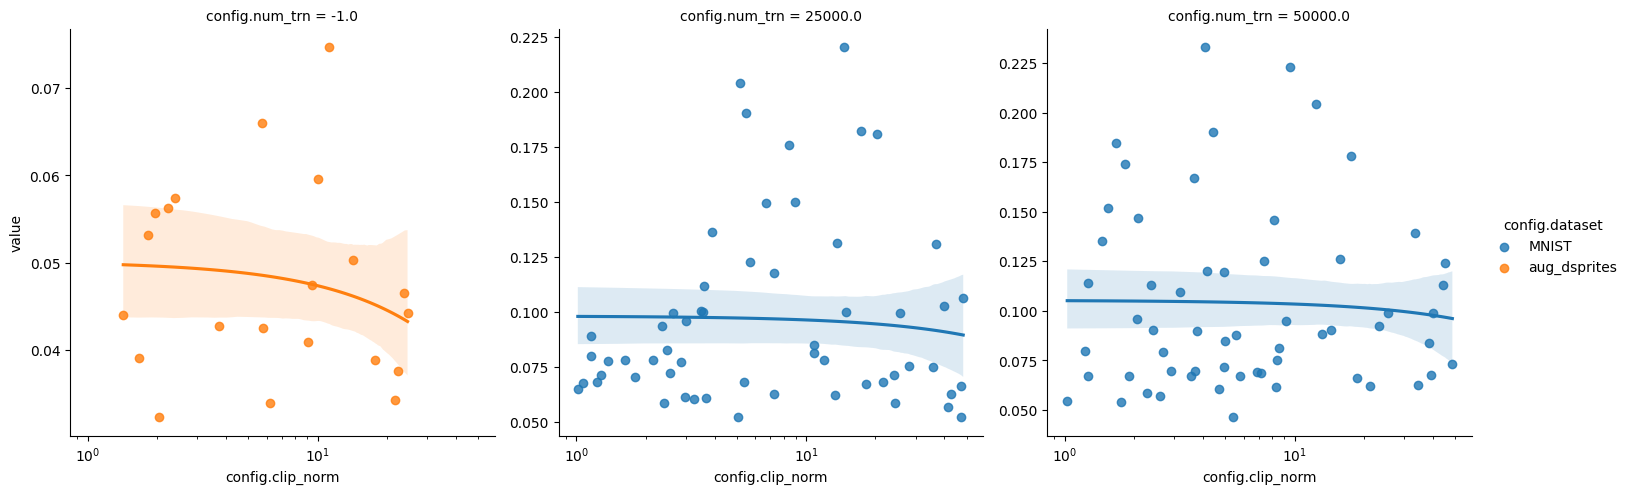

In [43]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.clip_norm",
    y="value",
    col="config.num_trn",  hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

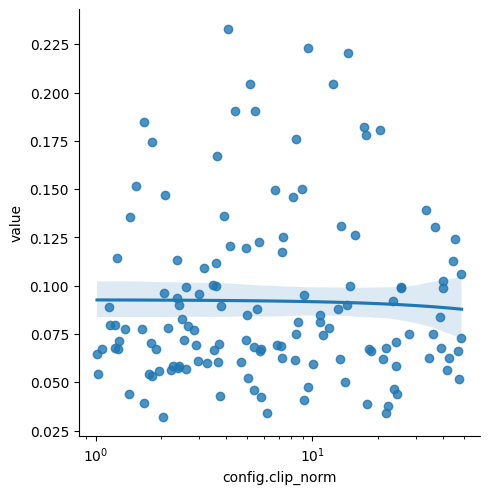

In [44]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.clip_norm",
    y="value",
    # hue='config.dataset', col='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

### difficulty_weighted_loss

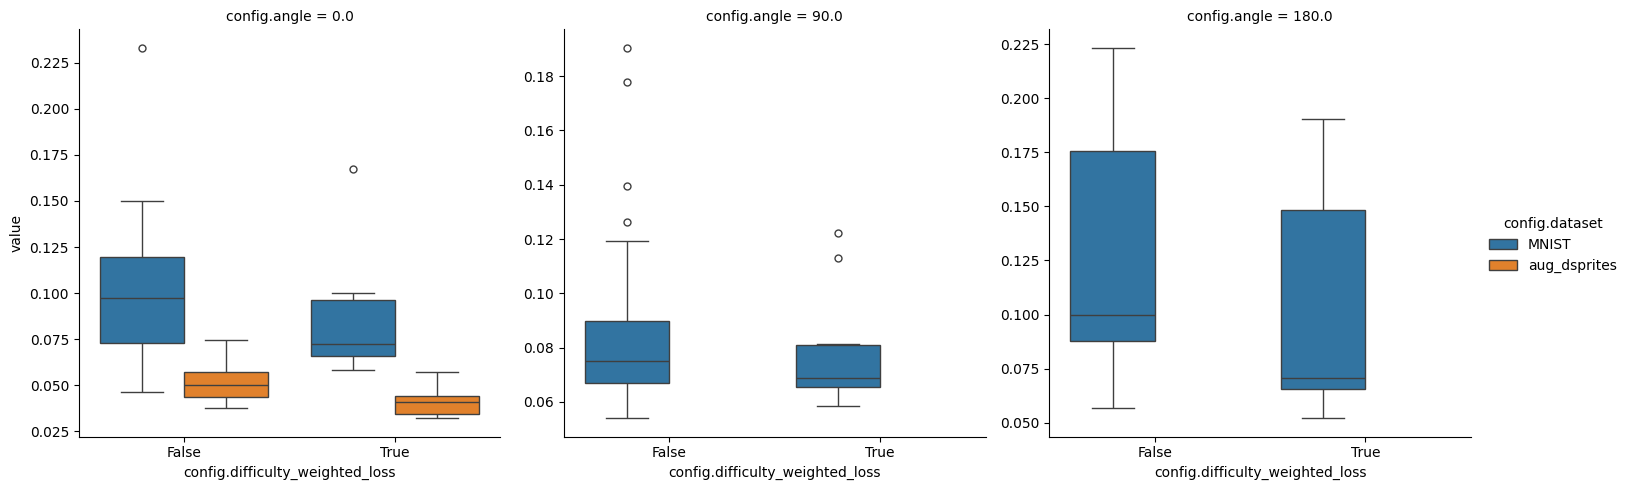

In [45]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.difficulty_weighted_loss",
    y="value",
    col="config.angle", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

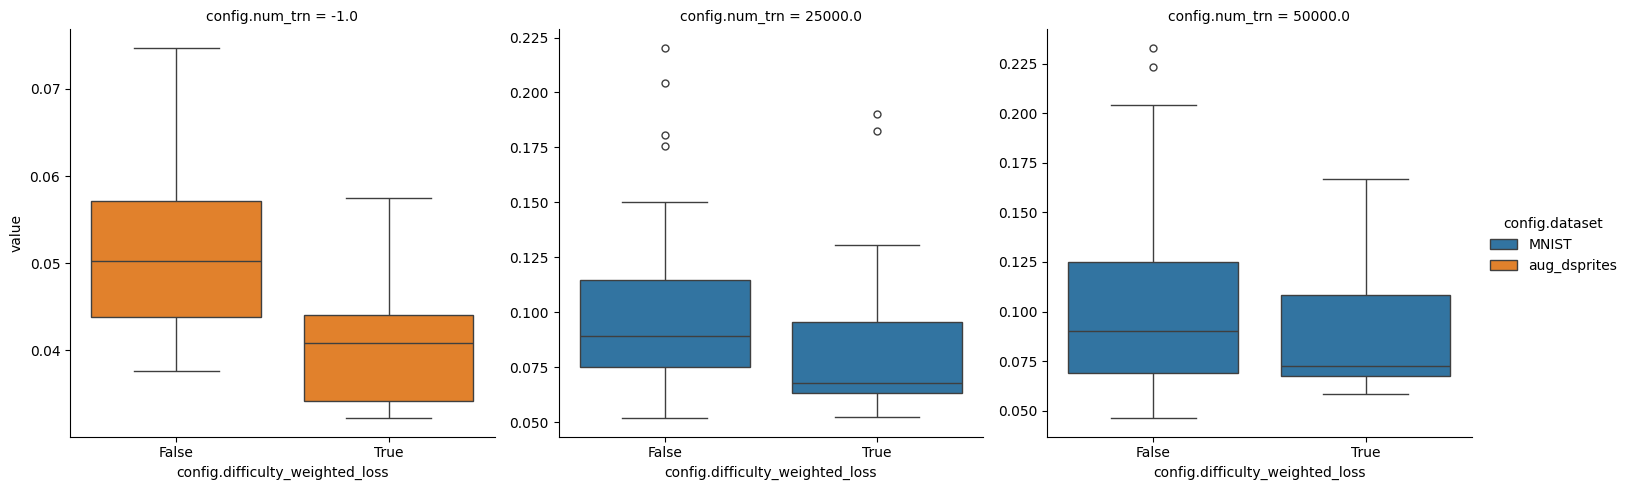

In [46]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.difficulty_weighted_loss",
    y="value",
    col="config.num_trn", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

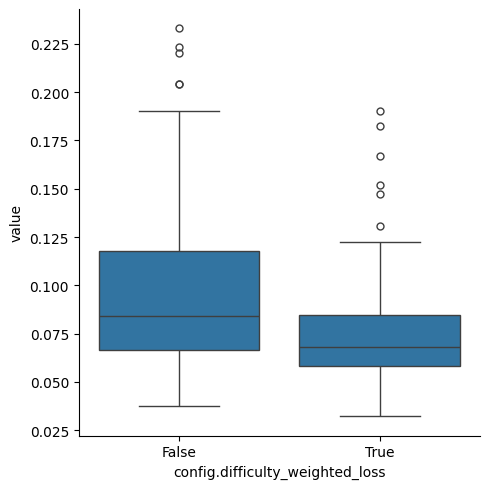

In [47]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.difficulty_weighted_loss",
    y="value",
    # hue='config.dataset', col='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### final_lr_mult

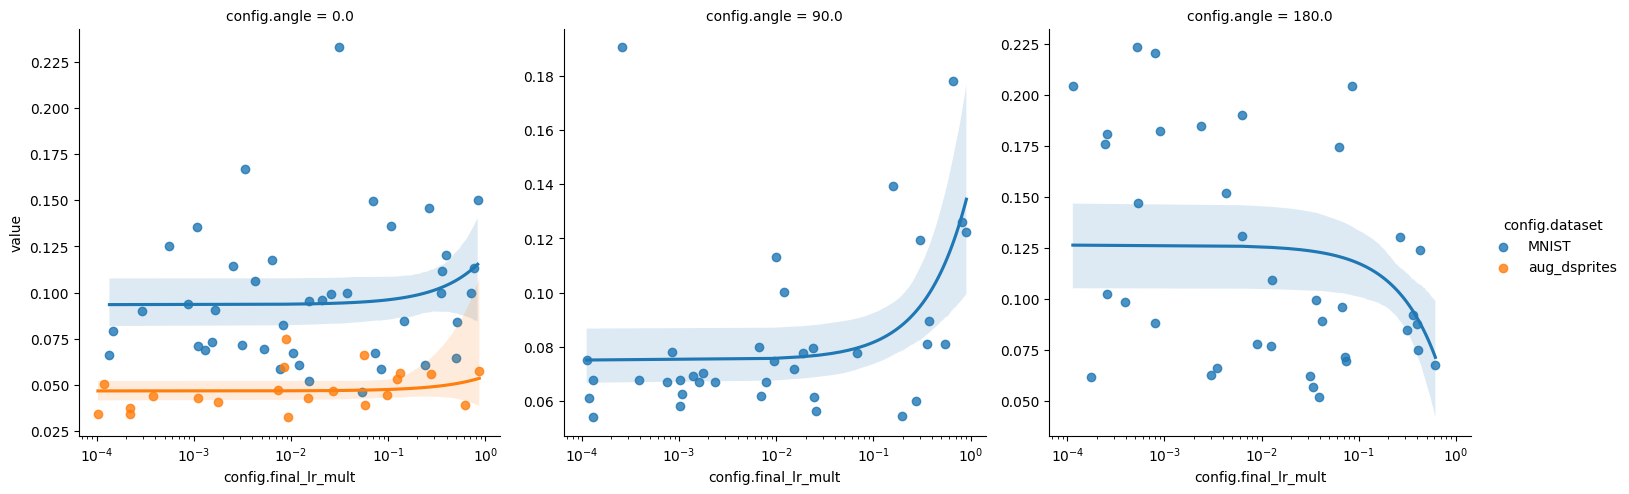

In [48]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.final_lr_mult",
    y="value",
    col="config.angle", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

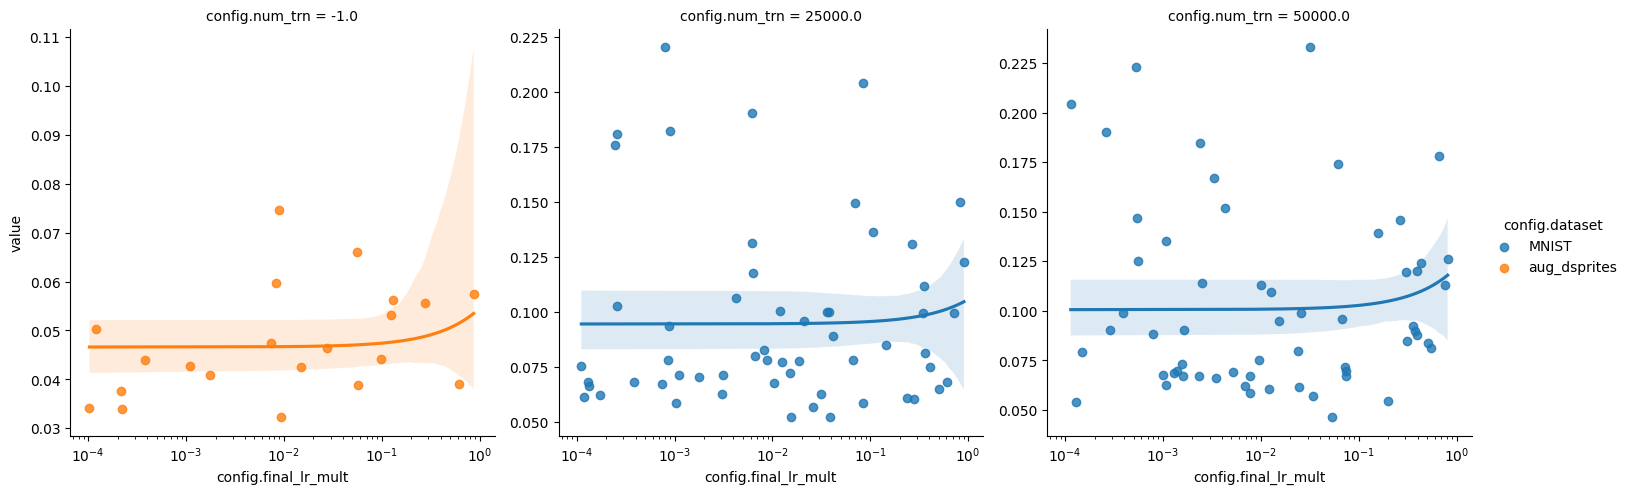

In [49]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.final_lr_mult",
    y="value",
    col="config.num_trn", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

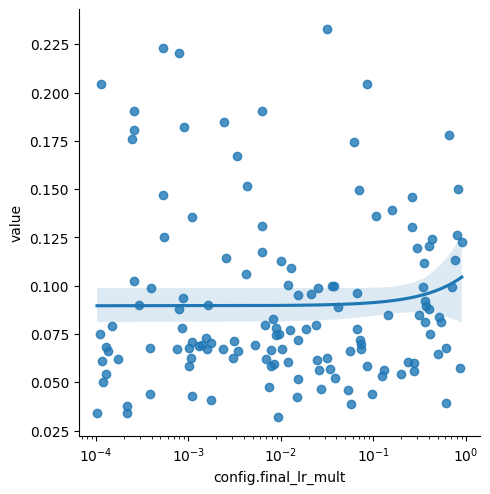

In [50]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.final_lr_mult",
    y="value",
    # hue='config.dataset', col='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

### init_lr_mult

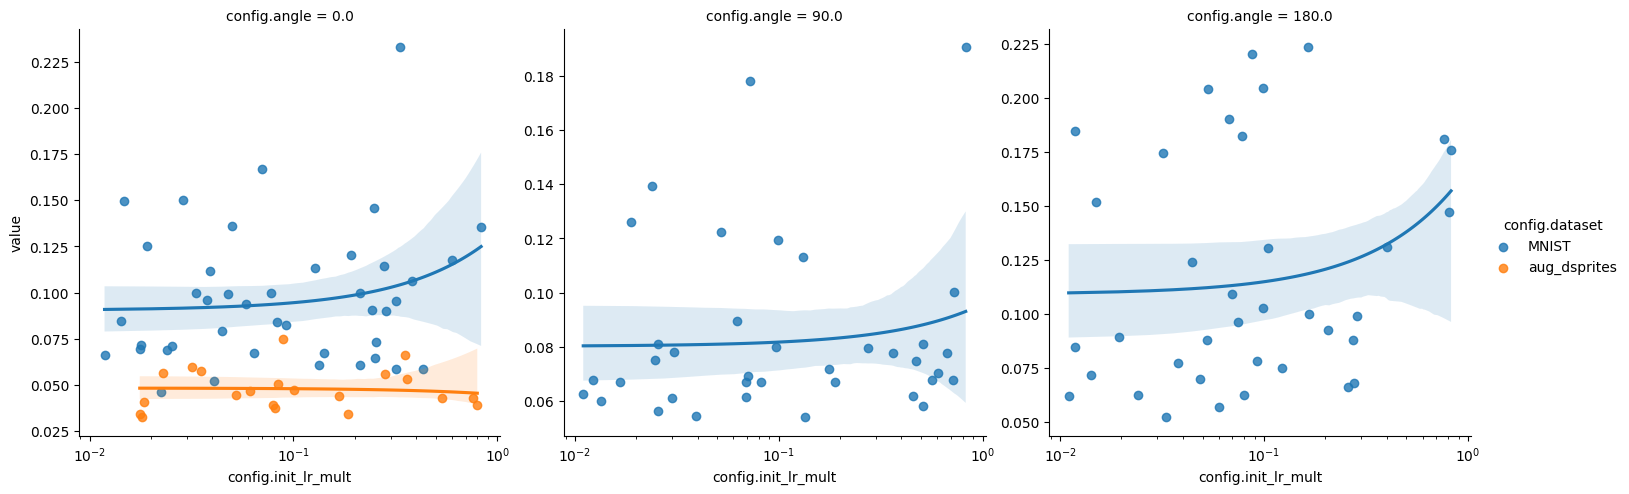

In [51]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.init_lr_mult",
    y="value",
    col="config.angle", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

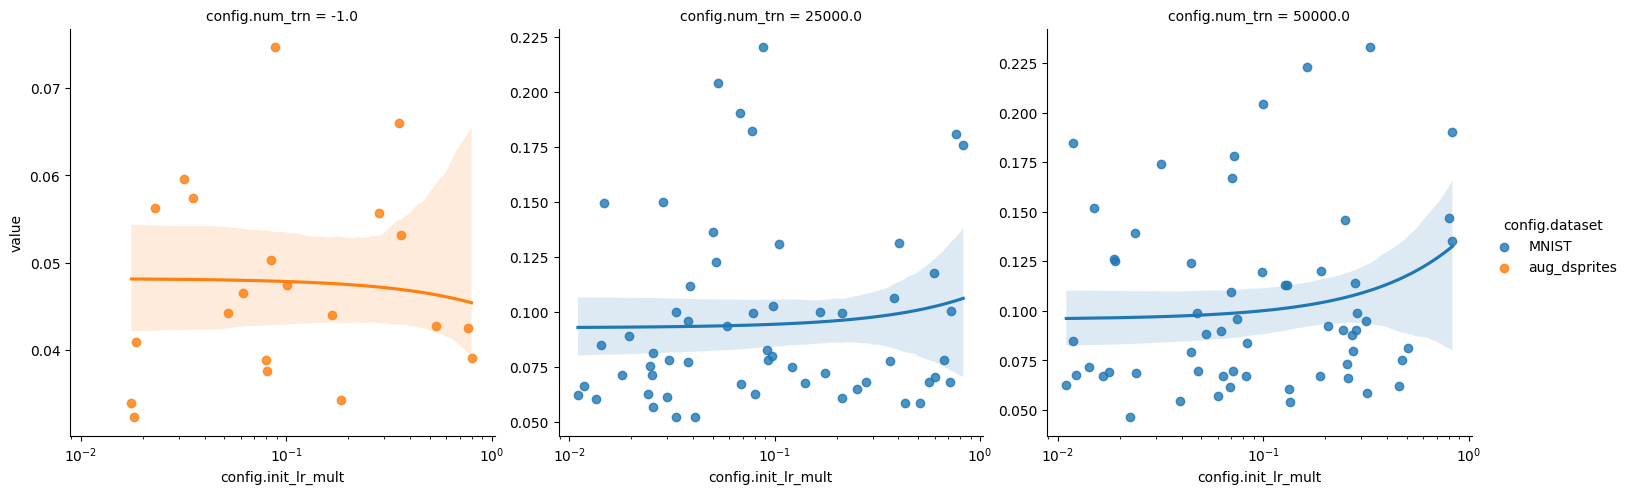

In [52]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.init_lr_mult",
    y="value",
    col="config.num_trn", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

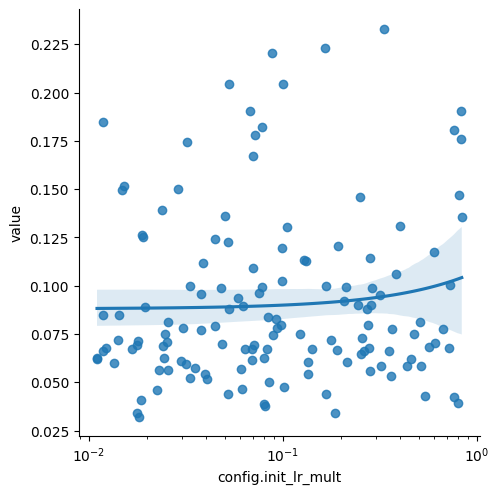

In [53]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.init_lr_mult",
    y="value",
    # hue='config.dataset', col='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

### invertibility_loss_mult

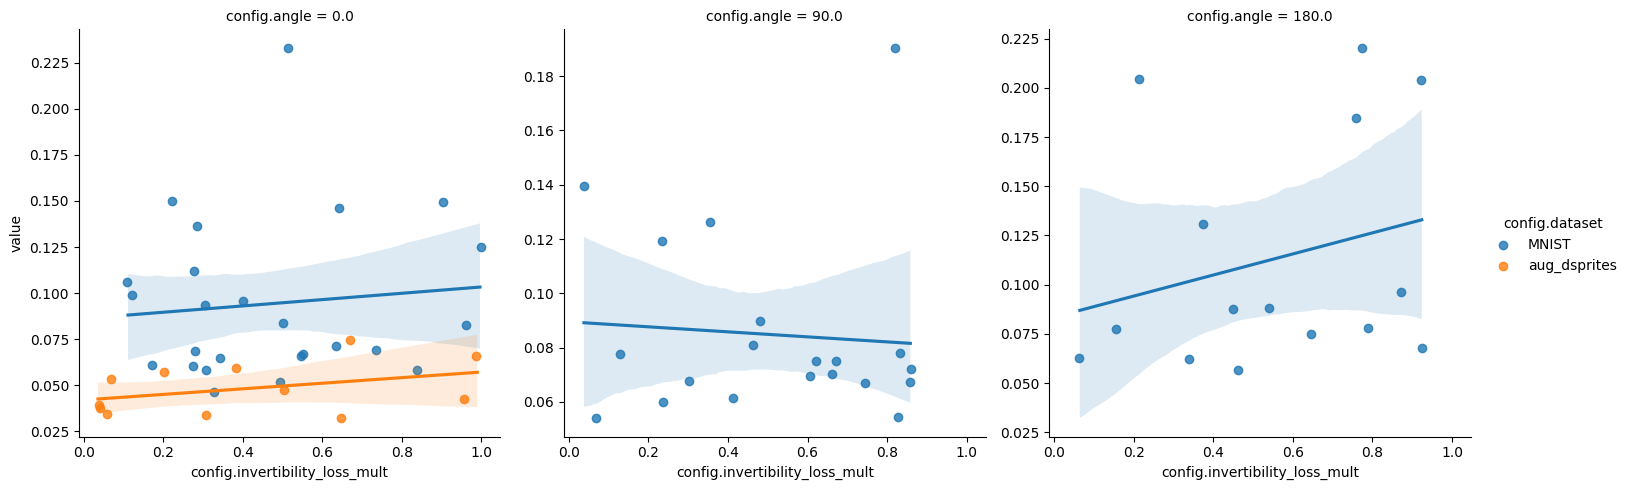

In [60]:
g = sns.lmplot(
    data=df[(df.metric == METRIC) & (df['config.model.squash_to_bounds'] == 'False')],
    x="config.invertibility_loss_mult",
    y="value",
    col="config.angle", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    x_jitter=0.005,
    order=1
)

# g.set(xscale="log")

g

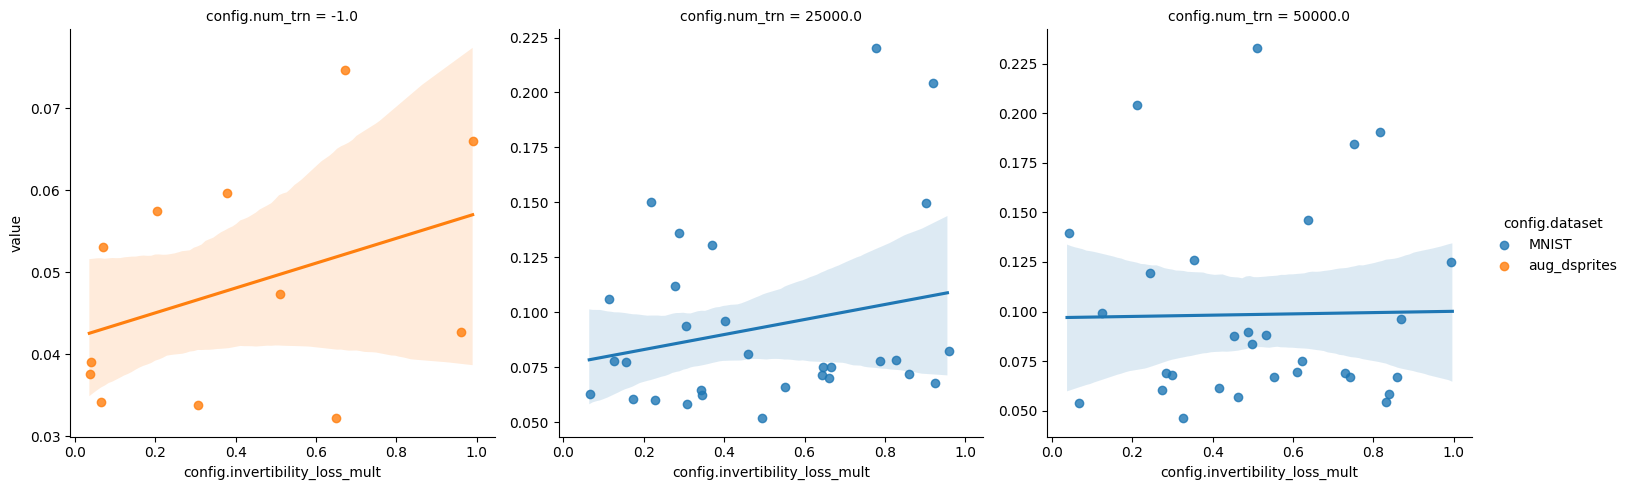

In [61]:
g = sns.lmplot(
    data=df[(df.metric == METRIC) & (df['config.model.squash_to_bounds'] == 'False')],
    x="config.invertibility_loss_mult",
    y="value",
    col="config.num_trn", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    x_jitter=0.005,
    order=1
)

# g.set(xscale="log")

g

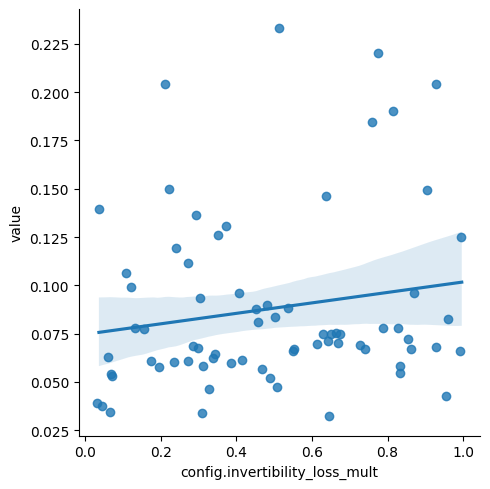

In [59]:
g = sns.lmplot(
    data=df[(df.metric == METRIC)& (df['config.model.squash_to_bounds'] == 'False')],
    x="config.invertibility_loss_mult",
    y="value",
    # hue='config.dataset', col='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    x_jitter=0.005,
    order=1
)

# g.set(xscale="log")

g

### lr

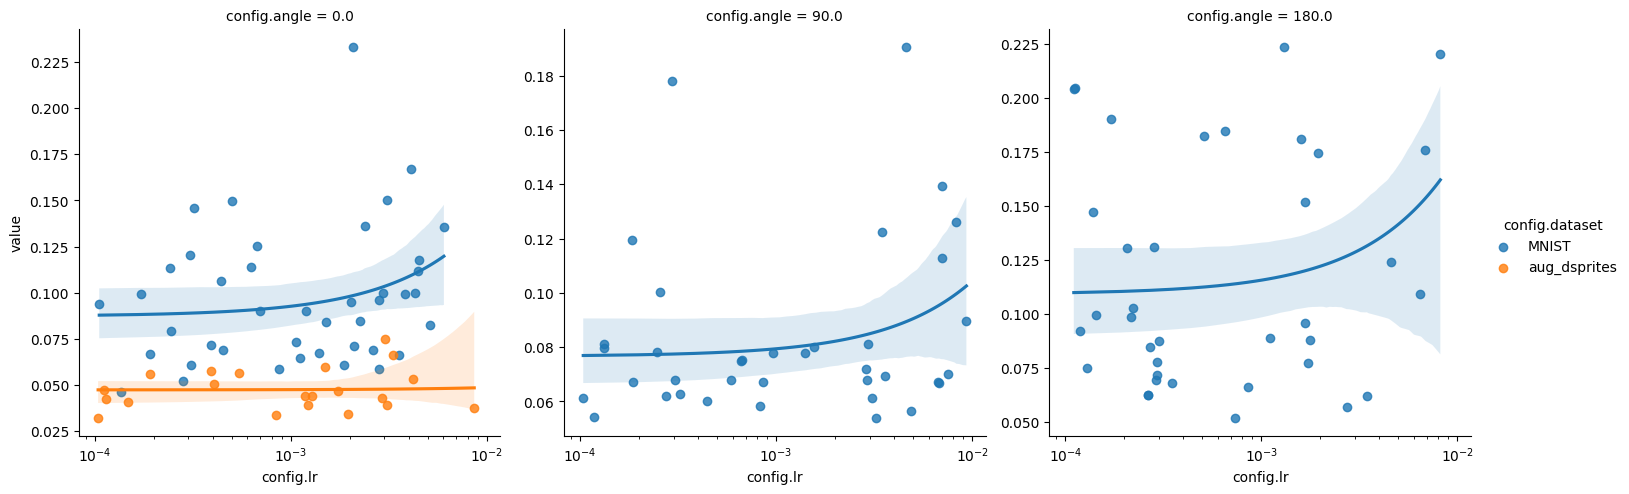

In [201]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.lr",
    y="value",
    col="config.angle", hue='config.dataset', 
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

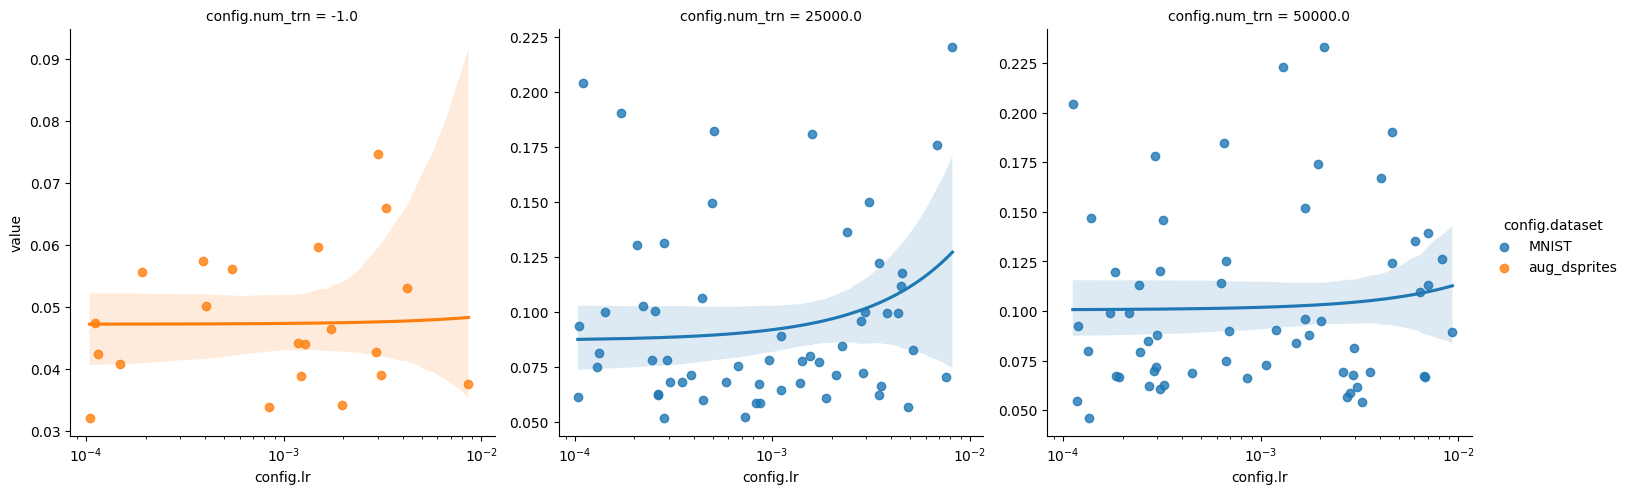

In [202]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.lr",
    y="value",
    col="config.num_trn", hue='config.dataset', 
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

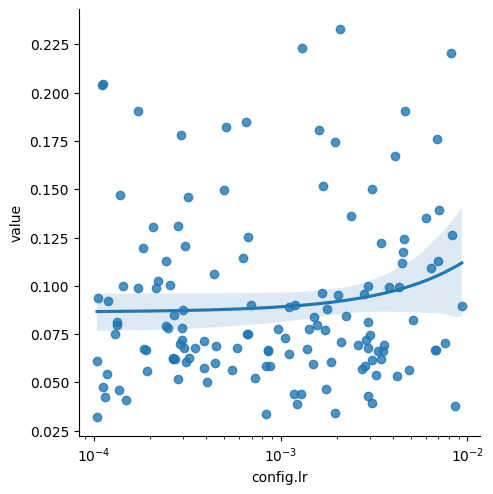

In [203]:
g = sns.lmplot(
    data=df[df.metric == METRIC],
    x="config.lr",
    y="value",
    # hue='config.dataset', col='config.dataset', 
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

### model.convnext_type

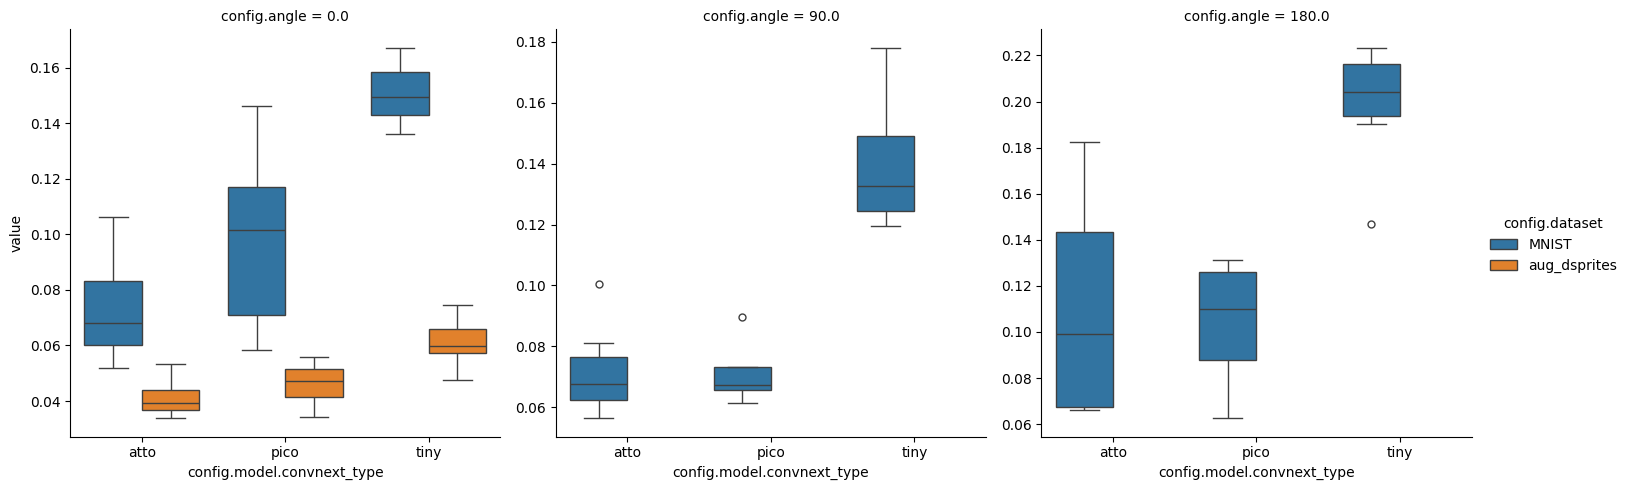

In [204]:
g = sns.catplot(
    data=df[(df.metric == METRIC) & (df['config.model.model_type'] == 'convnext')],
    x="config.model.convnext_type",
    y="value",
    col="config.angle", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(xscale="log")

g

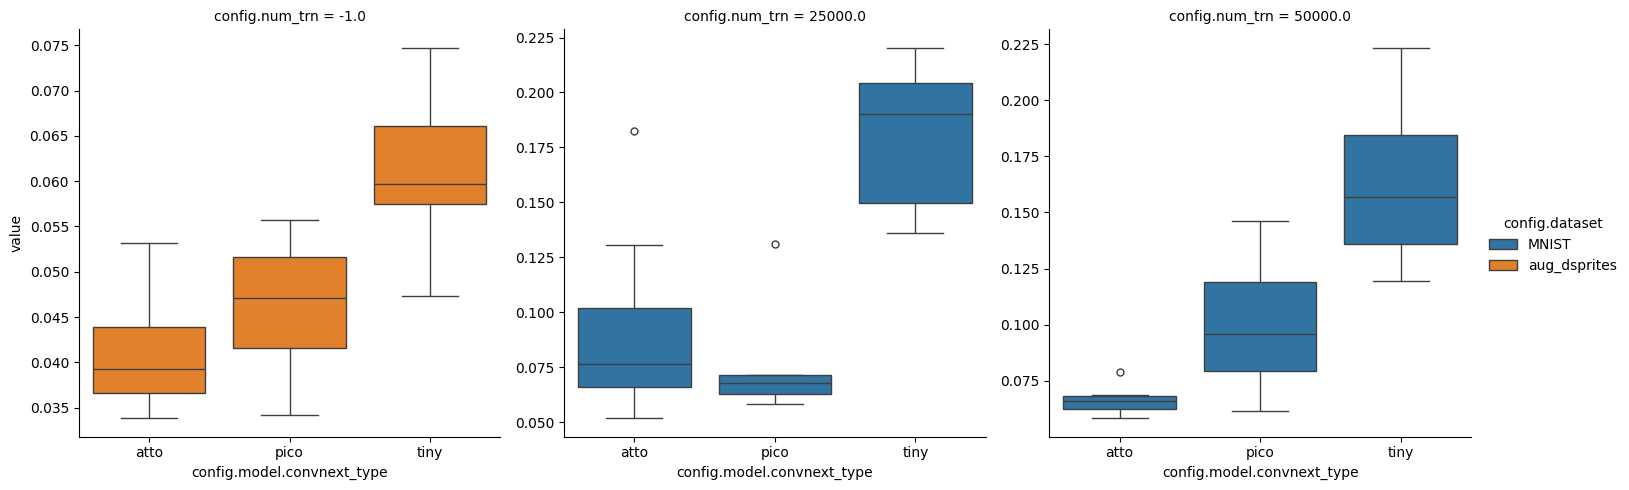

In [205]:
g = sns.catplot(
    data=df[(df.metric == METRIC) & (df['config.model.model_type'] == 'convnext')],
    x="config.model.convnext_type",
    y="value",
    col="config.num_trn", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(xscale="log")

g

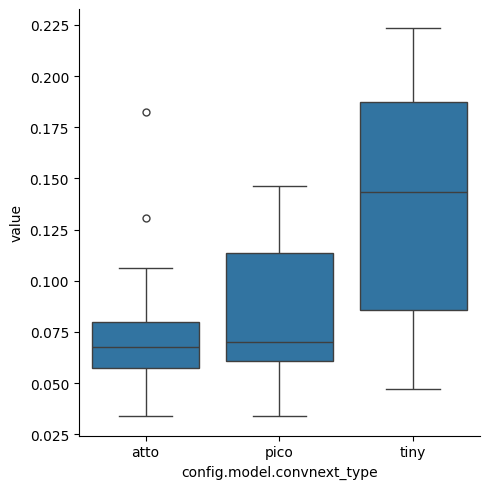

In [206]:
g = sns.catplot(
    data=df[(df.metric == METRIC) & (df['config.model.model_type'] == 'convnext')],
    x="config.model.convnext_type",
    y="value",
    # hue='config.dataset', col='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(xscale="log")

g

### model.hidden_dims

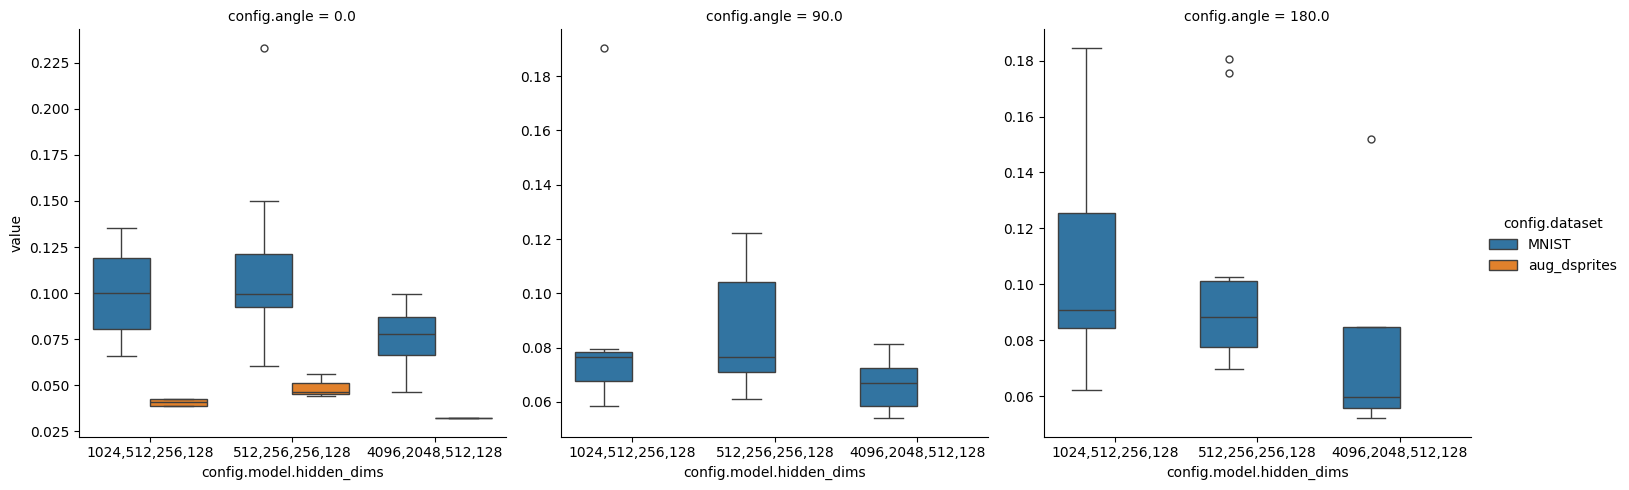

In [207]:
g = sns.catplot(
    data=df[(df.metric == METRIC) & (df['config.model.model_type'] != 'convnext')],
    x="config.model.hidden_dims",
    y="value",
    col="config.angle", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

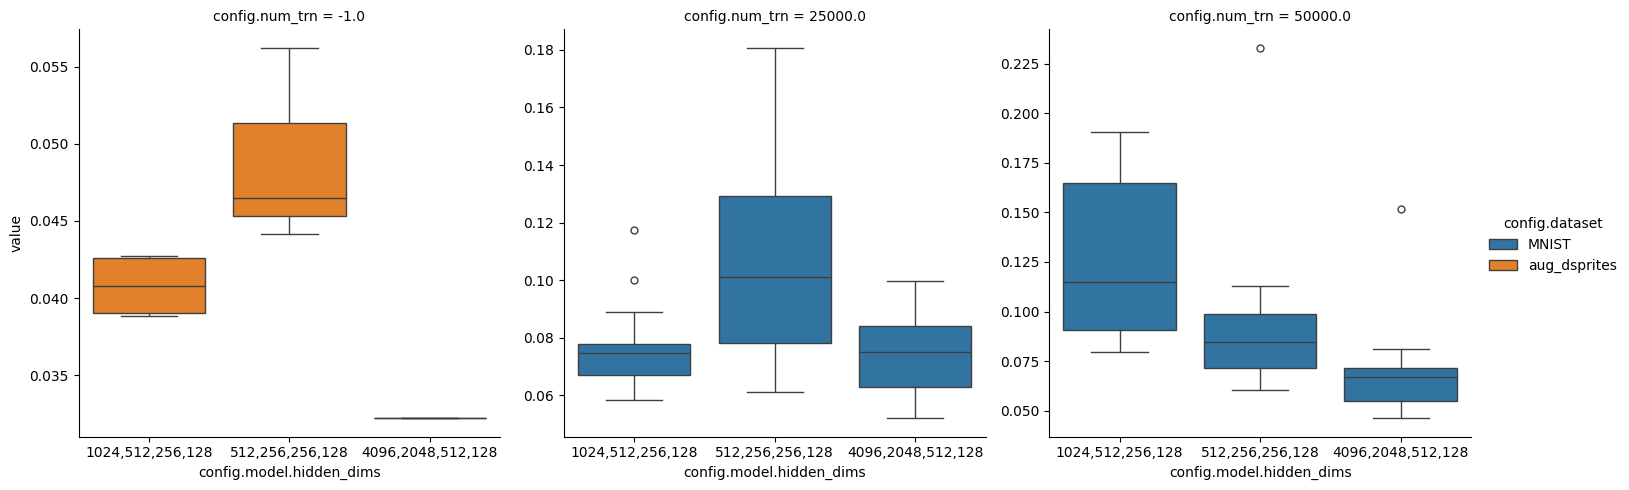

In [208]:
g = sns.catplot(
    data=df[(df.metric == METRIC) & (df['config.model.model_type'] != 'convnext')],
    x="config.model.hidden_dims",
    y="value",
    col="config.num_trn", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

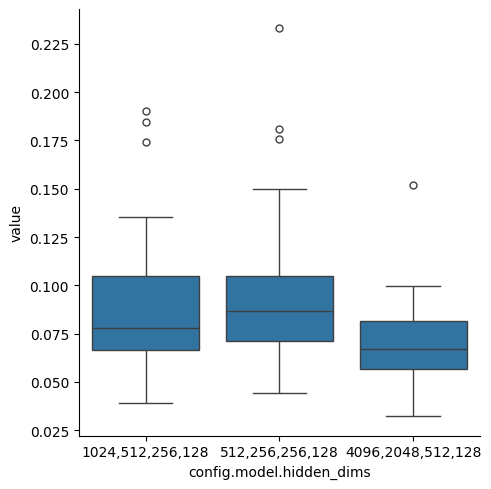

In [209]:
g = sns.catplot(
    data=df[(df.metric == METRIC) & (df['config.model.model_type'] != 'convnext')],
    x="config.model.hidden_dims",
    y="value",
    # hue='config.dataset', col='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### model.model_type

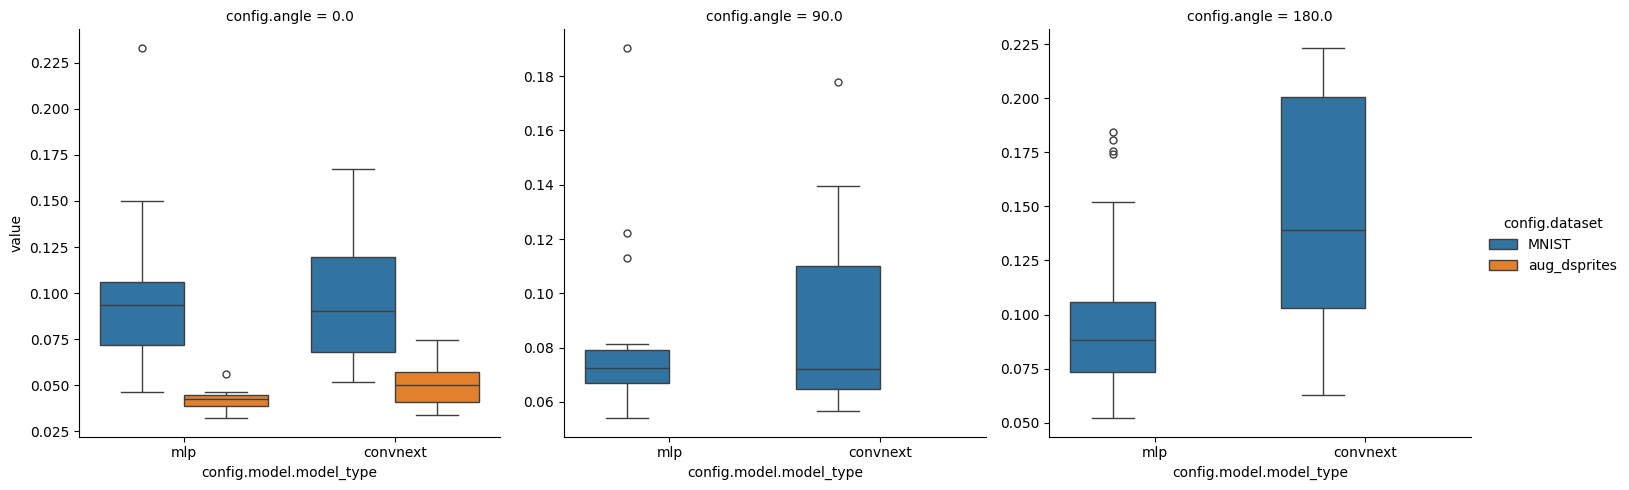

In [210]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.model.model_type",
    y="value",
    col="config.angle", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

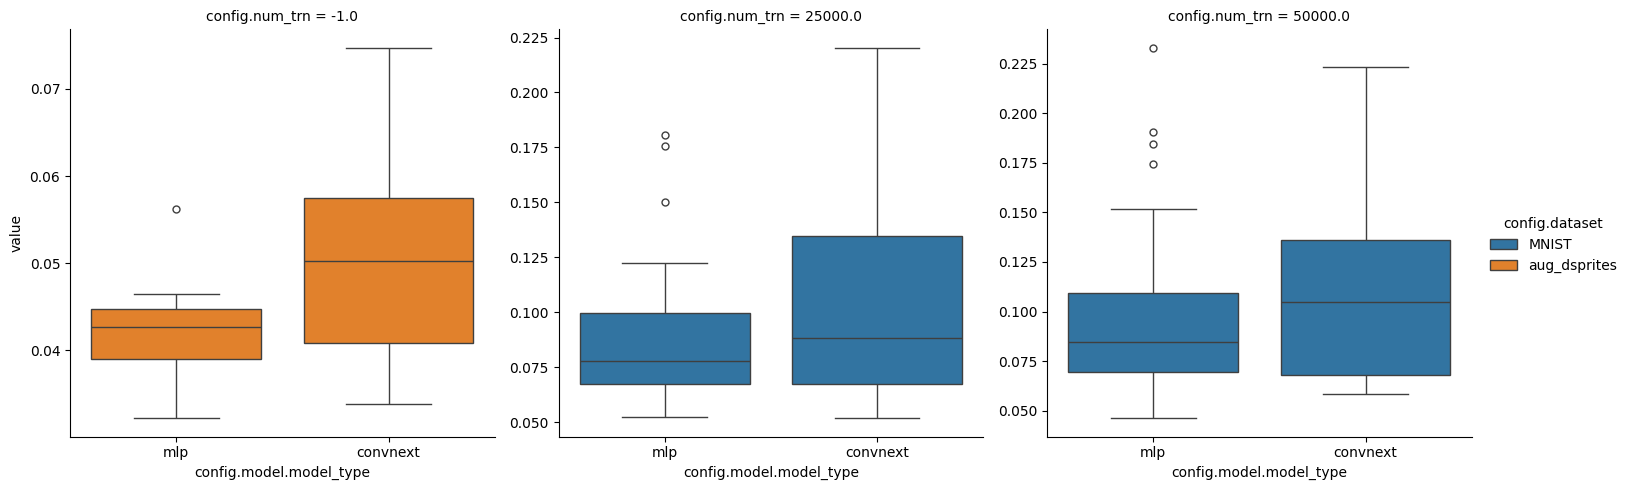

In [211]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.model.model_type",
    y="value",
    col="config.num_trn", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

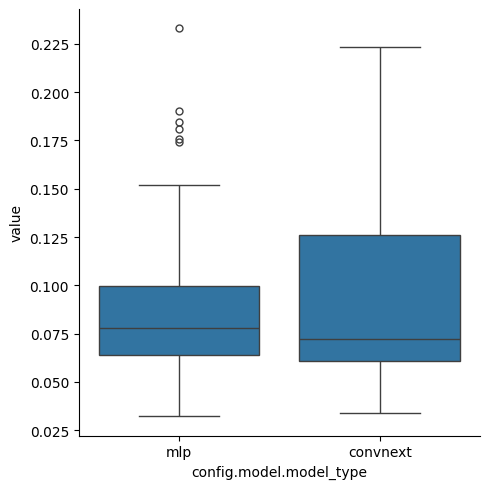

In [212]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.model.model_type",
    y="value",
    # hue='config.dataset', col='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### model.squash_to_bounds

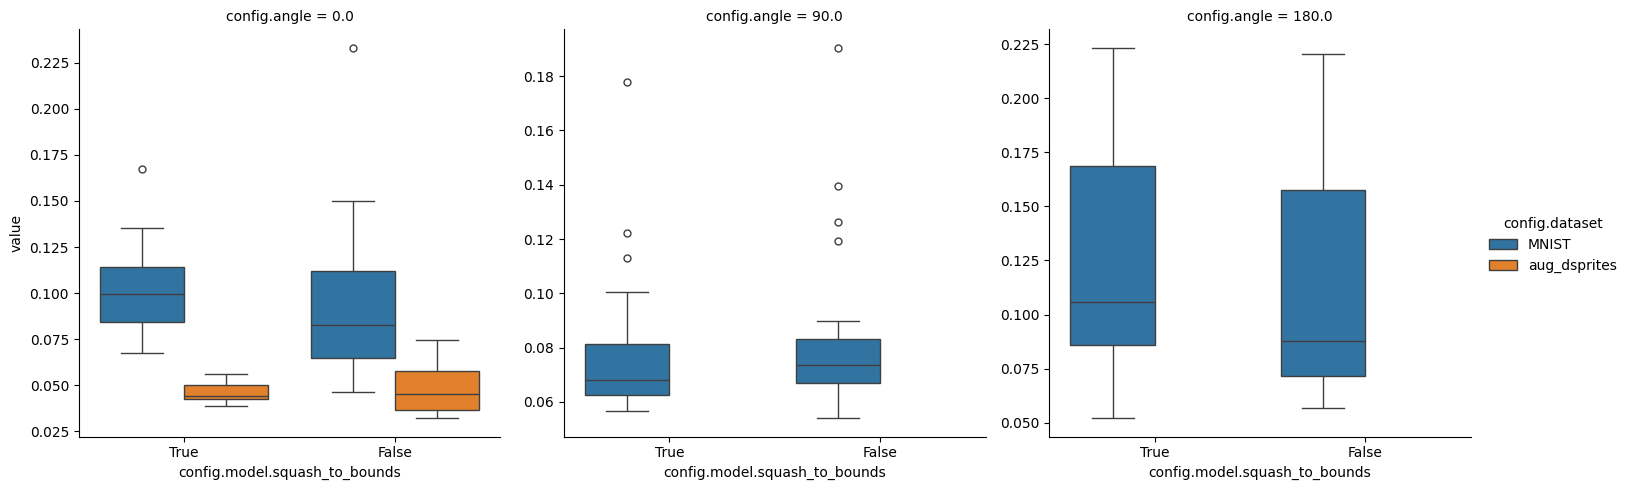

In [213]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.model.squash_to_bounds",
    y="value",
    col="config.angle", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

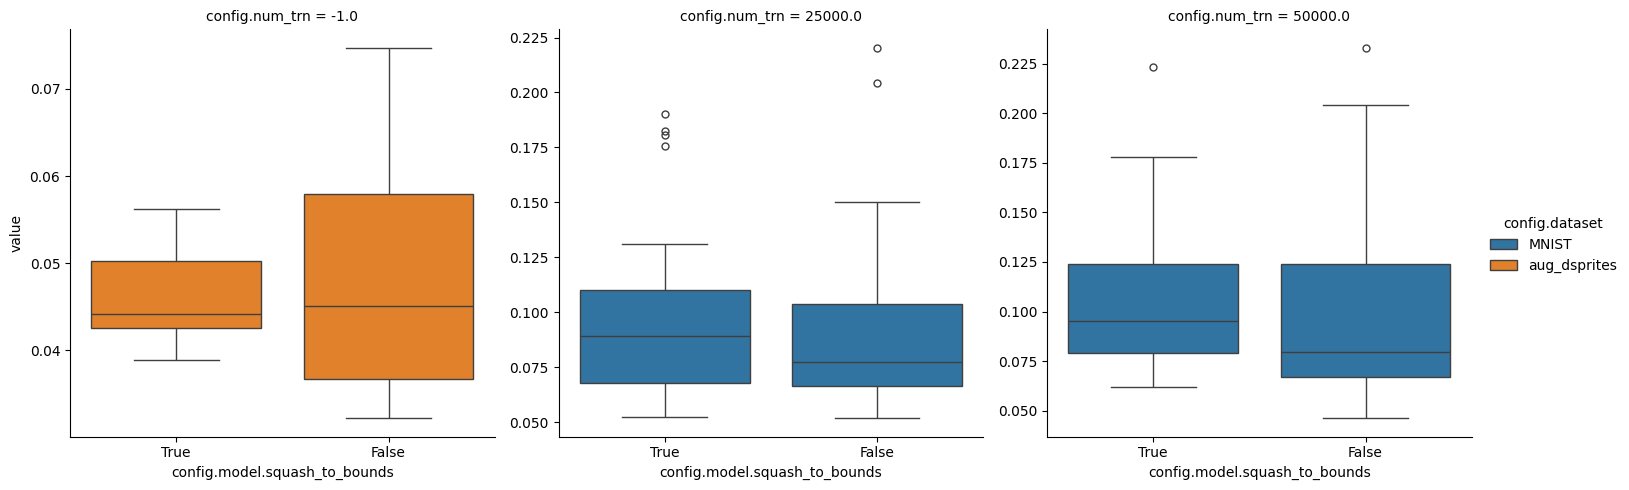

In [214]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.model.squash_to_bounds",
    y="value",
    col="config.num_trn", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

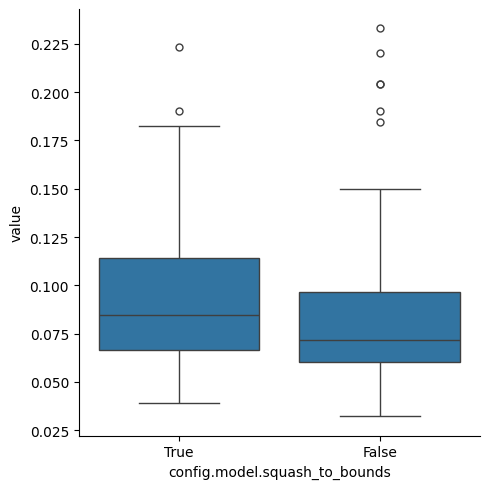

In [215]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.model.squash_to_bounds",
    y="value",
    # hue='config.dataset', col='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### n_samples

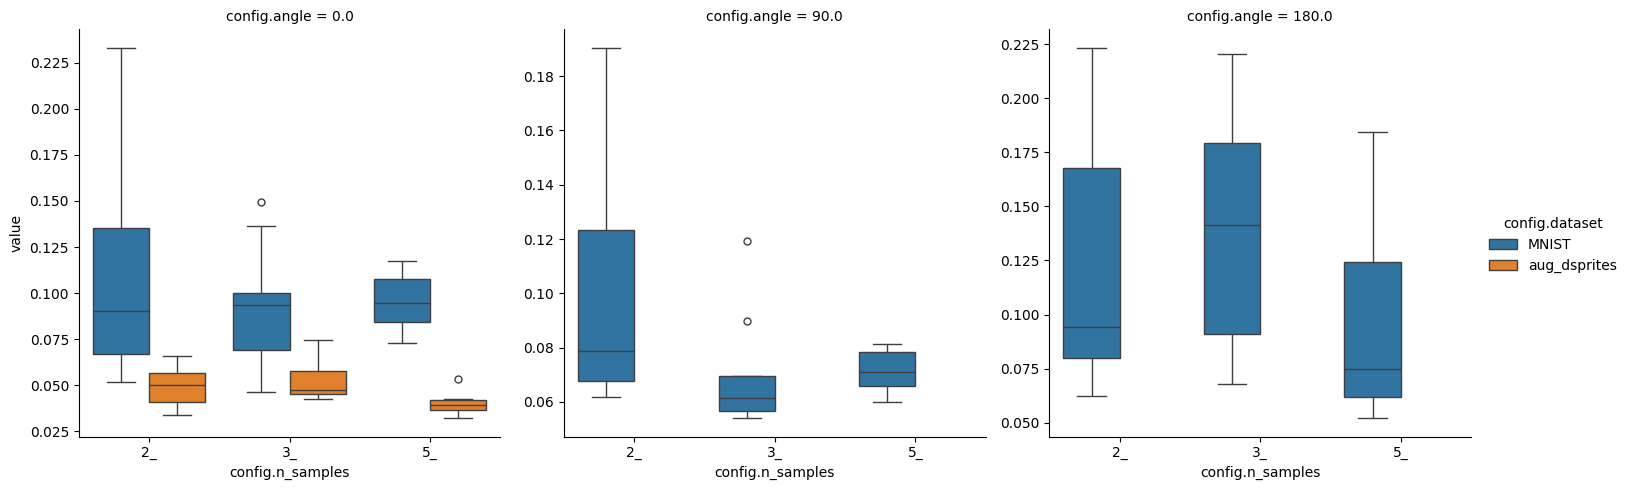

In [216]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.n_samples",
    y="value",
    col="config.angle", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)


# g.set(yscale="log")

g

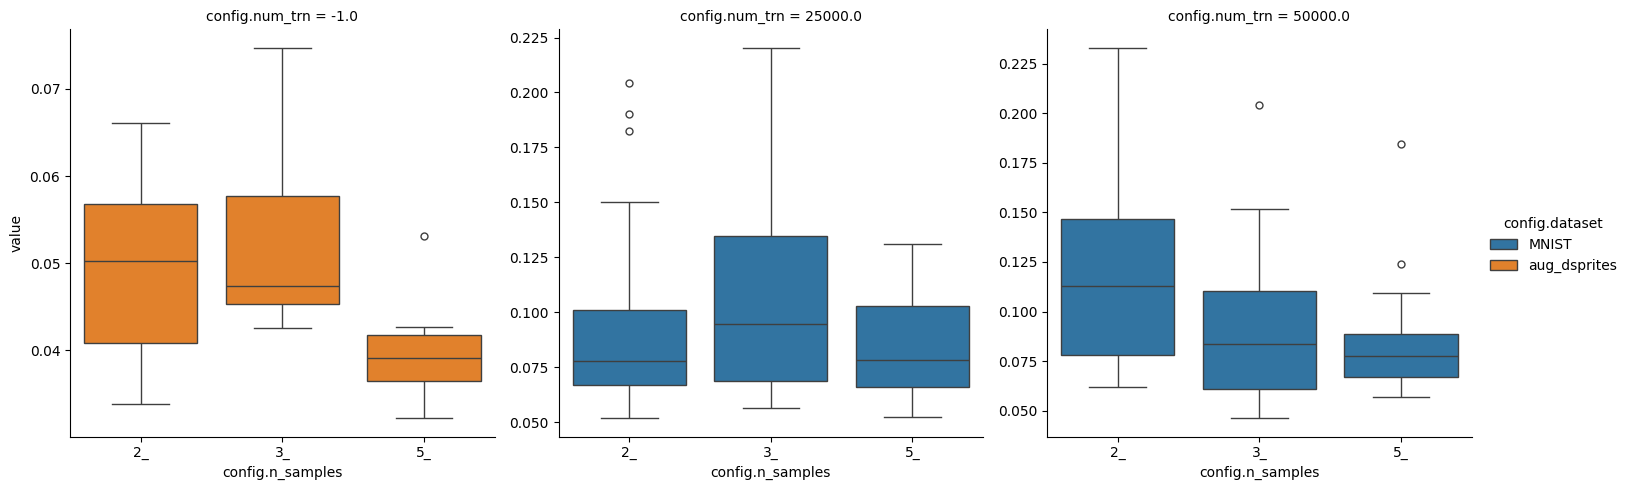

In [217]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.n_samples",
    y="value",
    col="config.num_trn", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)


# g.set(yscale="log")

g

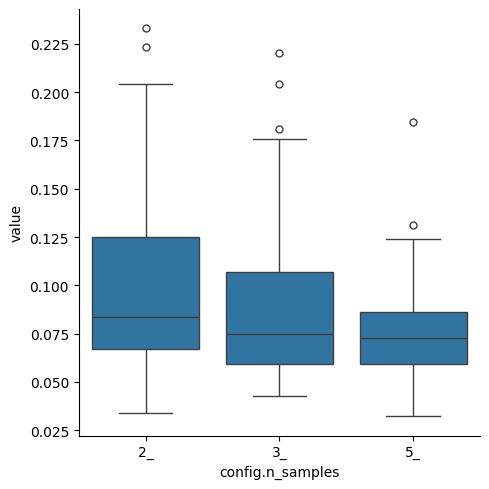

In [218]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.n_samples",
    y="value",
    # hue='config.dataset', col='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)


# g.set(yscale="log")

g

### steps

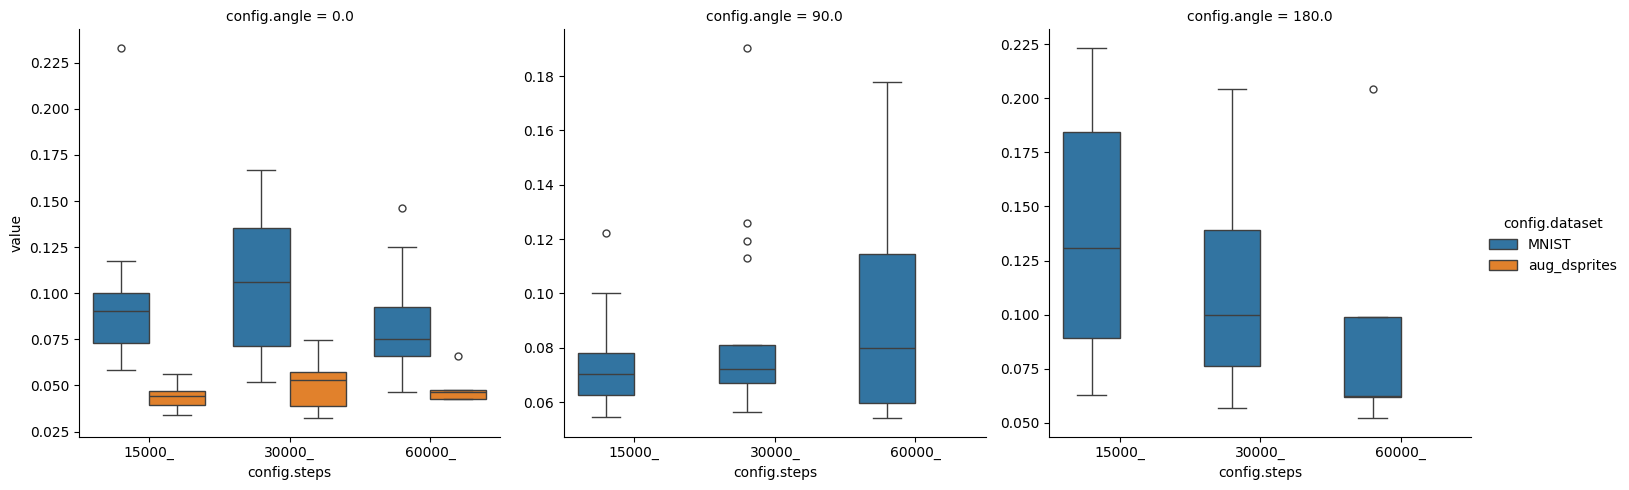

In [219]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.steps",
    y="value",
    col="config.angle", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

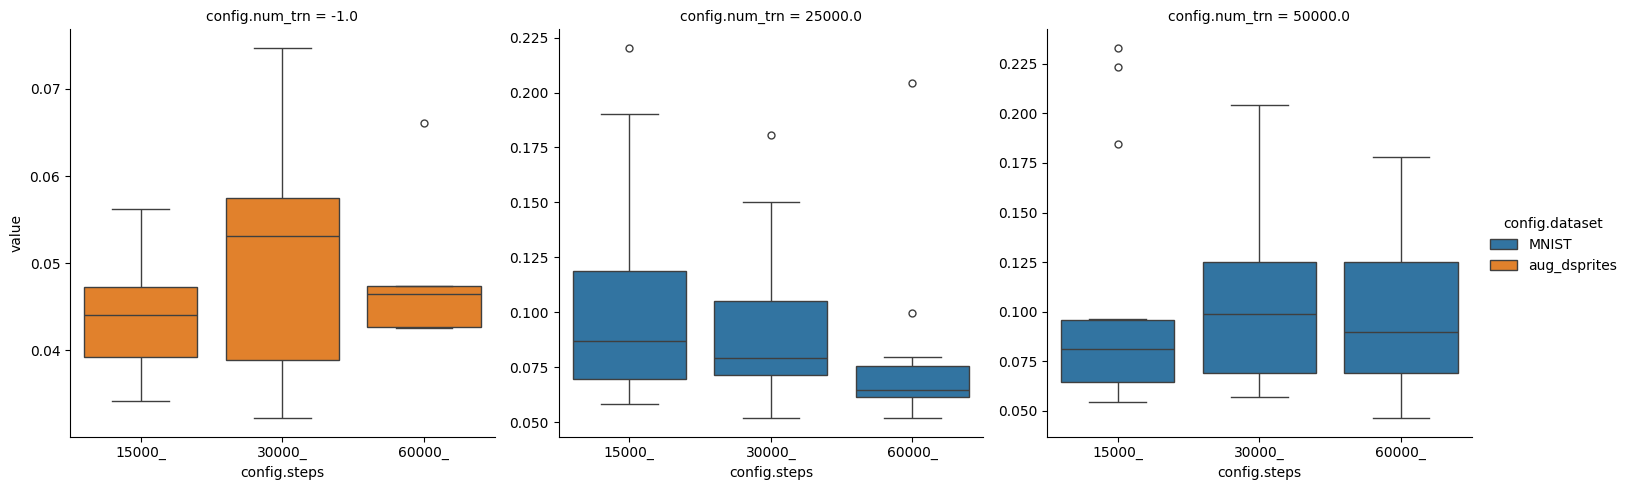

In [220]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.steps",
    y="value",
    col="config.num_trn", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

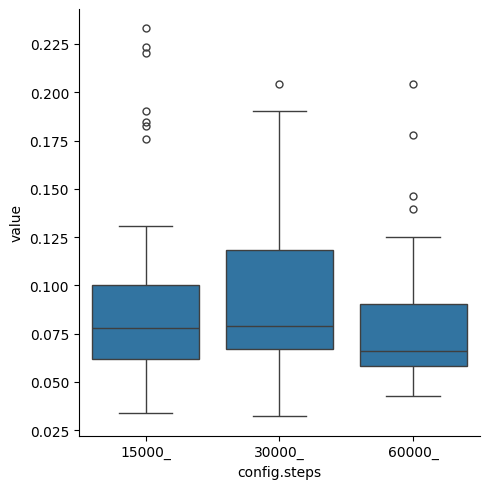

In [221]:
g = sns.catplot(
    data=df[(df.metric == METRIC)],
    x="config.steps",
    y="value",
    # hue='config.dataset', col='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### symmetrised_samples_in_loss

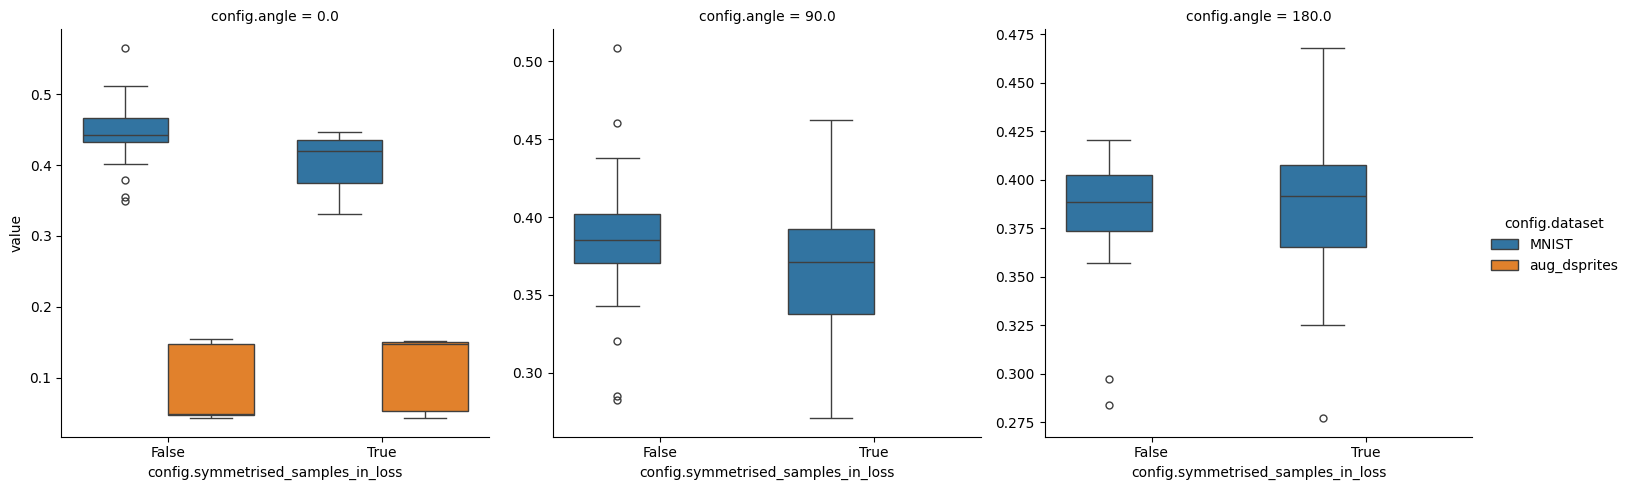

In [222]:
g = sns.catplot(
    data=df[(df.metric == 'summary.valid/label_paired_image_mse')],
    x="config.symmetrised_samples_in_loss",
    y="value",
    col="config.angle", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

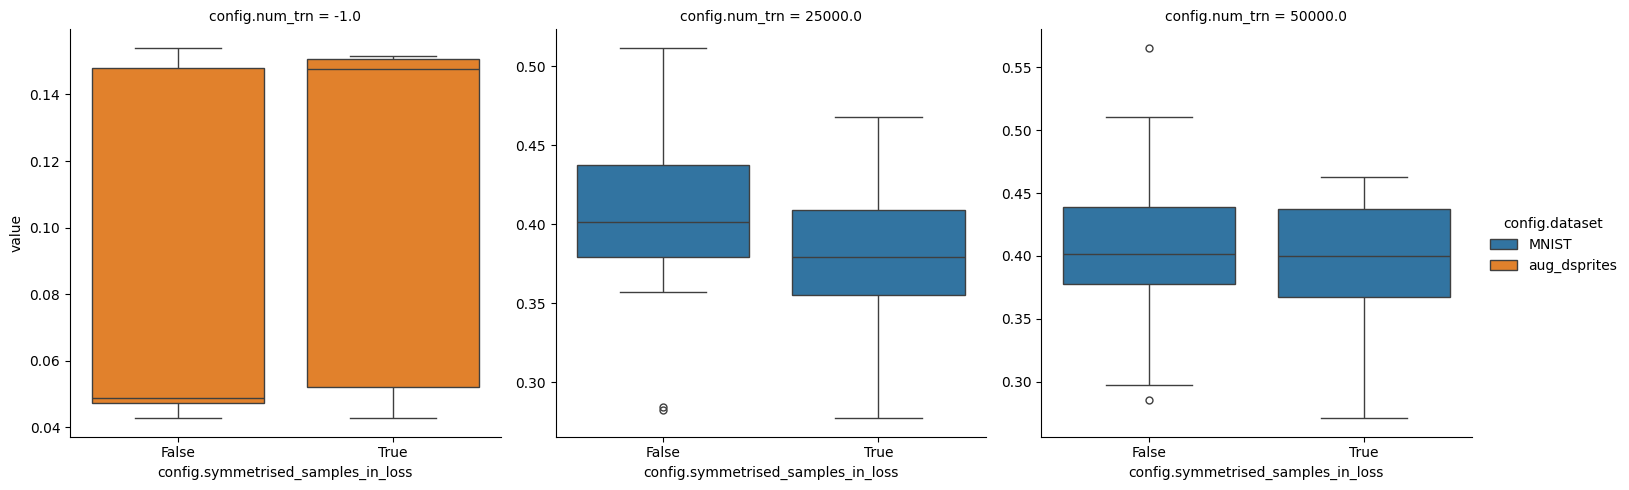

In [223]:
g = sns.catplot(
    data=df[(df.metric == 'summary.valid/label_paired_image_mse')],
    x="config.symmetrised_samples_in_loss",
    y="value",
    col="config.num_trn", hue='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

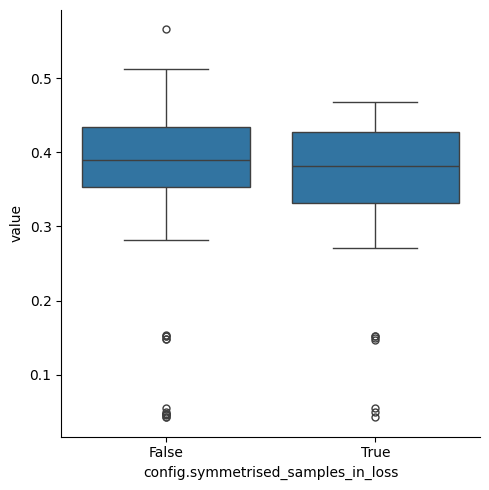

In [224]:
g = sns.catplot(
    data=df[(df.metric == 'summary.valid/label_paired_image_mse')],
    x="config.symmetrised_samples_in_loss",
    y="value",
    # hue='config.dataset', col='config.dataset',
    kind="box",
    sharex=True, sharey=False,
)

# g.set(yscale="log")

g

### warmup_steps_pct

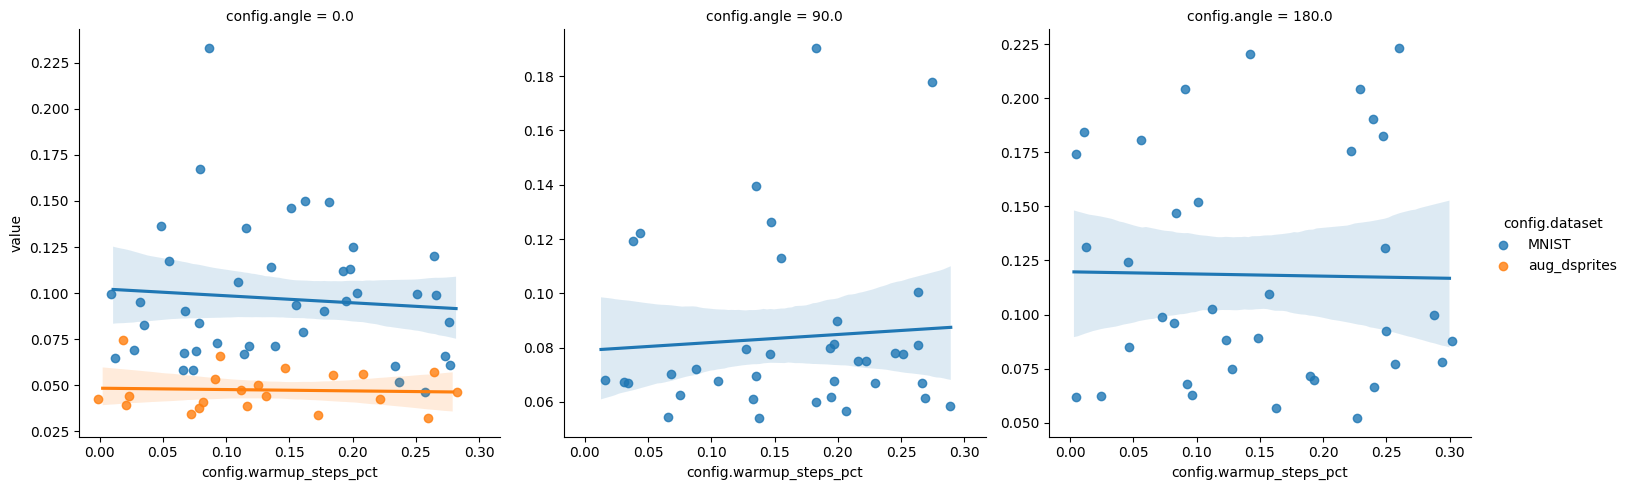

In [225]:
g = sns.lmplot(
    data=df[(df.metric == METRIC)],
    x="config.warmup_steps_pct",
    y="value",
    col="config.angle", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    x_jitter=0.005,
    order=1
)

# g.set(yscale="log")

g

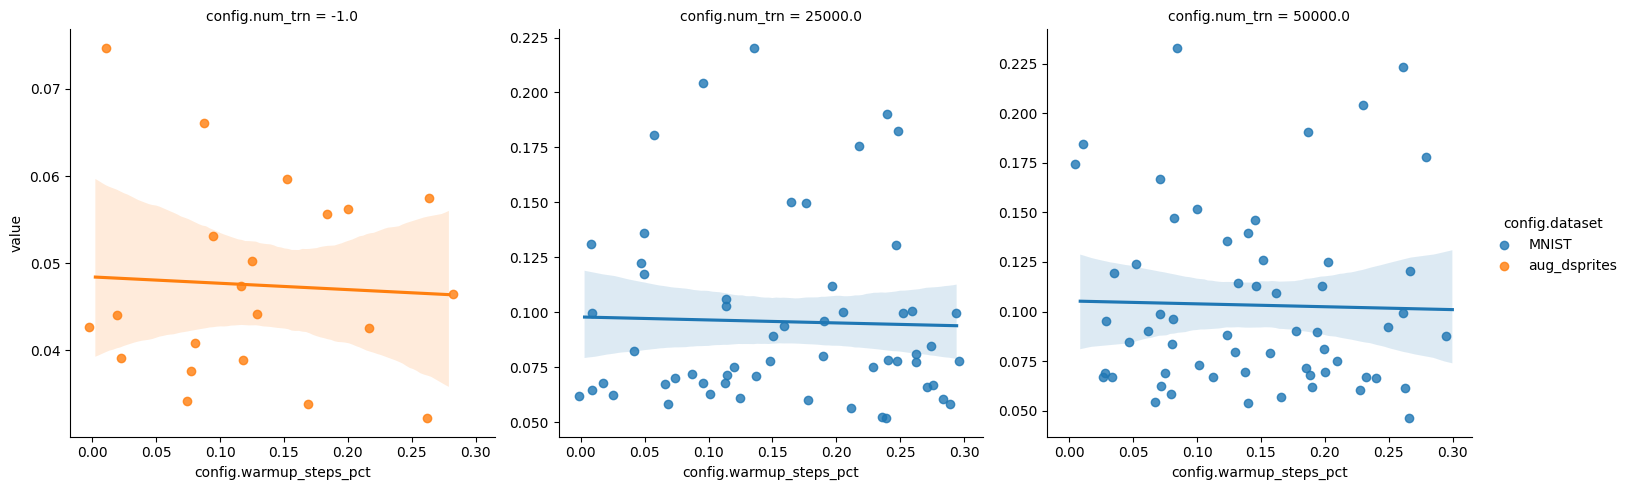

In [226]:
g = sns.lmplot(
    data=df[(df.metric == METRIC)],
    x="config.warmup_steps_pct",
    y="value",
    col="config.num_trn", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    x_jitter=0.005,
    order=1
)

# g.set(yscale="log")

g

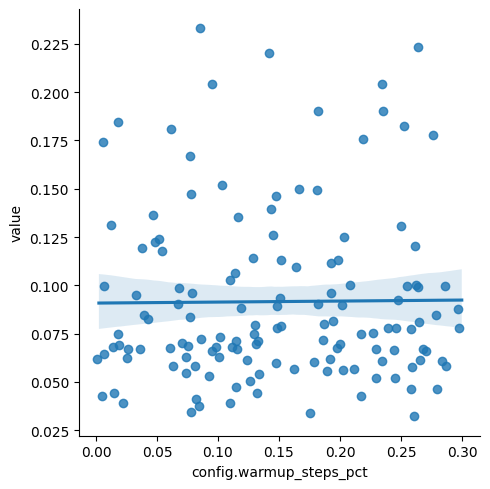

In [227]:
g = sns.lmplot(
    data=df[(df.metric == METRIC)],
    x="config.warmup_steps_pct",
    y="value",
    # hue='config.dataset', col='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    x_jitter=0.005,
    order=1
)

# g.set(yscale="log")

g

### weight_decay

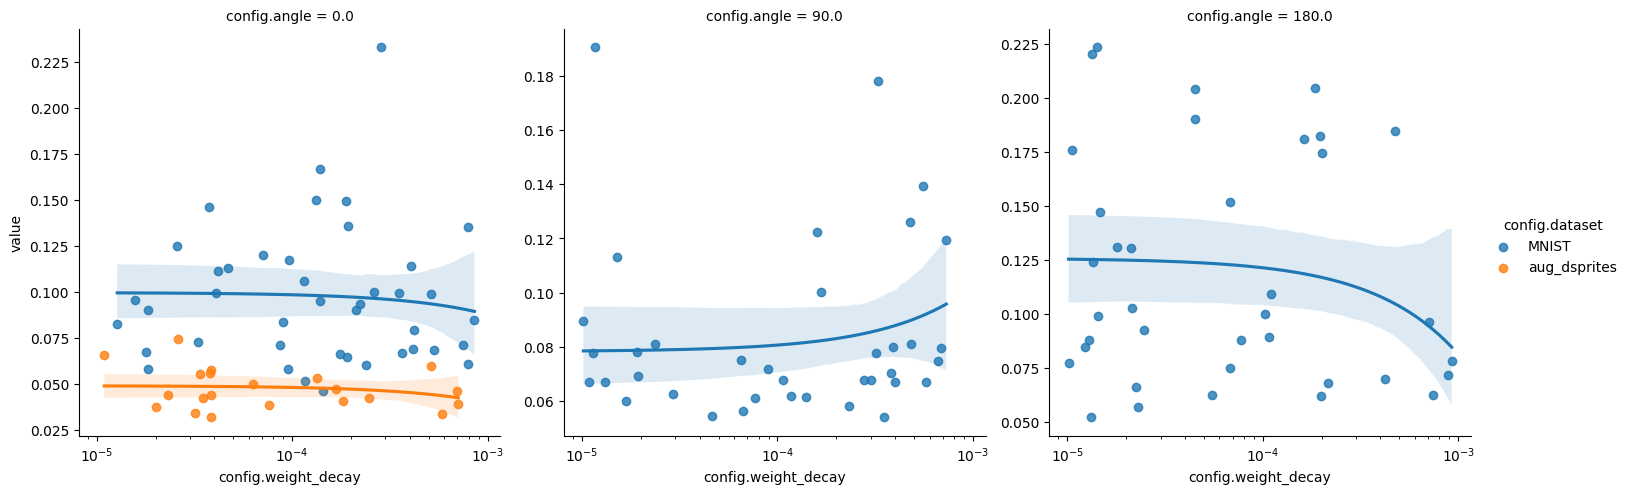

In [228]:
g = sns.lmplot(
    data=df[(df.metric == METRIC)],
    x="config.weight_decay",
    y="value",
    col="config.angle", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

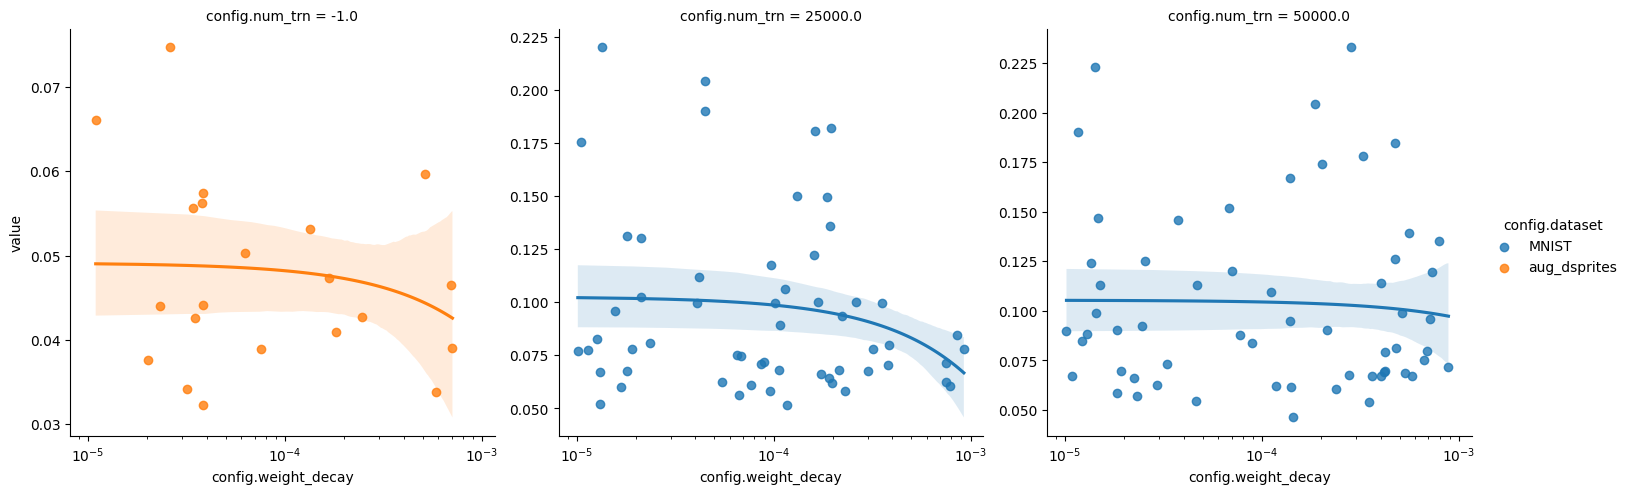

In [229]:
g = sns.lmplot(
    data=df[(df.metric == METRIC)],
    x="config.weight_decay",
    y="value",
    col="config.num_trn", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

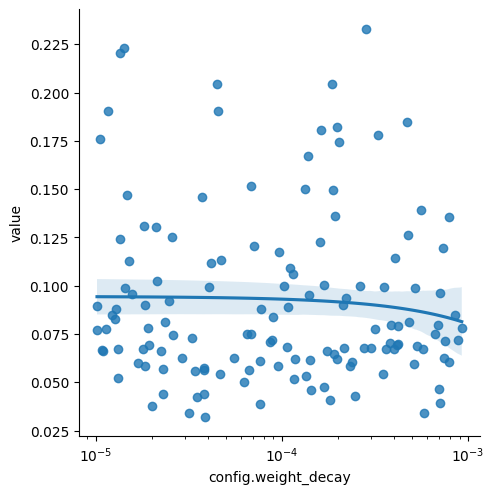

In [230]:
g = sns.lmplot(
    data=df[(df.metric == METRIC)],
    x="config.weight_decay",
    y="value",
    # hue='config.dataset', col='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    # x_jitter=0.05,
    order=1
)

g.set(xscale="log")

g

### η_loss_mult

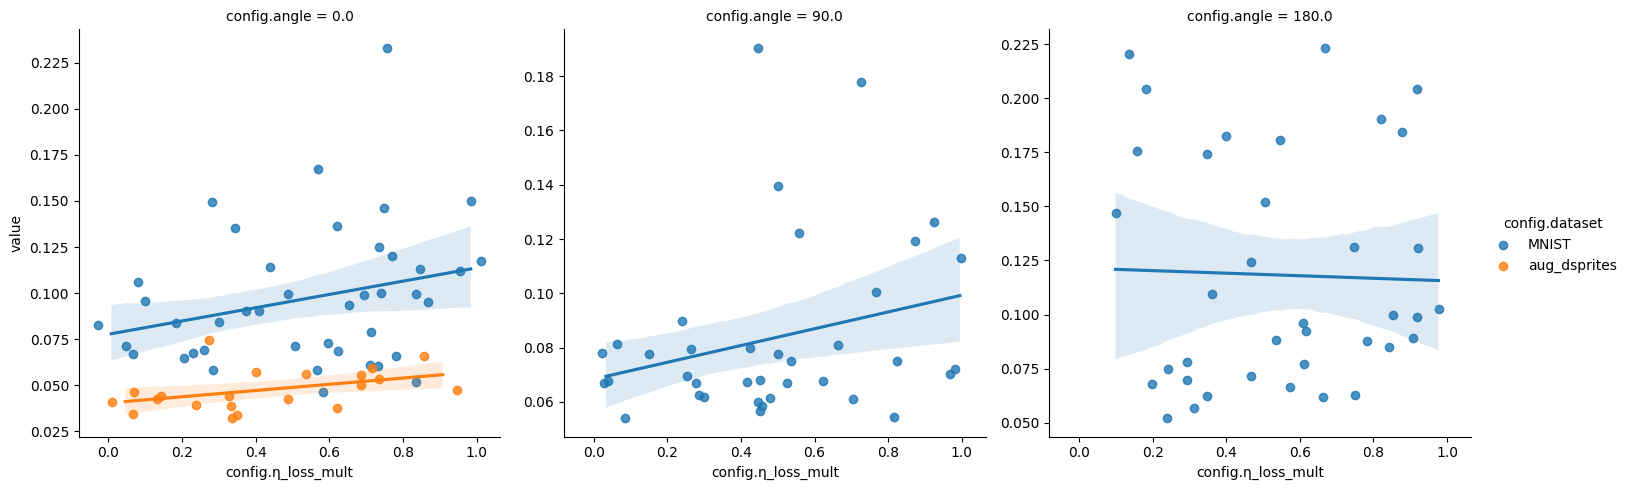

In [231]:
g = sns.lmplot(
    data=df[(df.metric == METRIC)],
    x="config.η_loss_mult",
    y="value",
    col="config.angle", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    x_jitter=0.05,
    order=1
)

# g.set(yscale="log",)

g

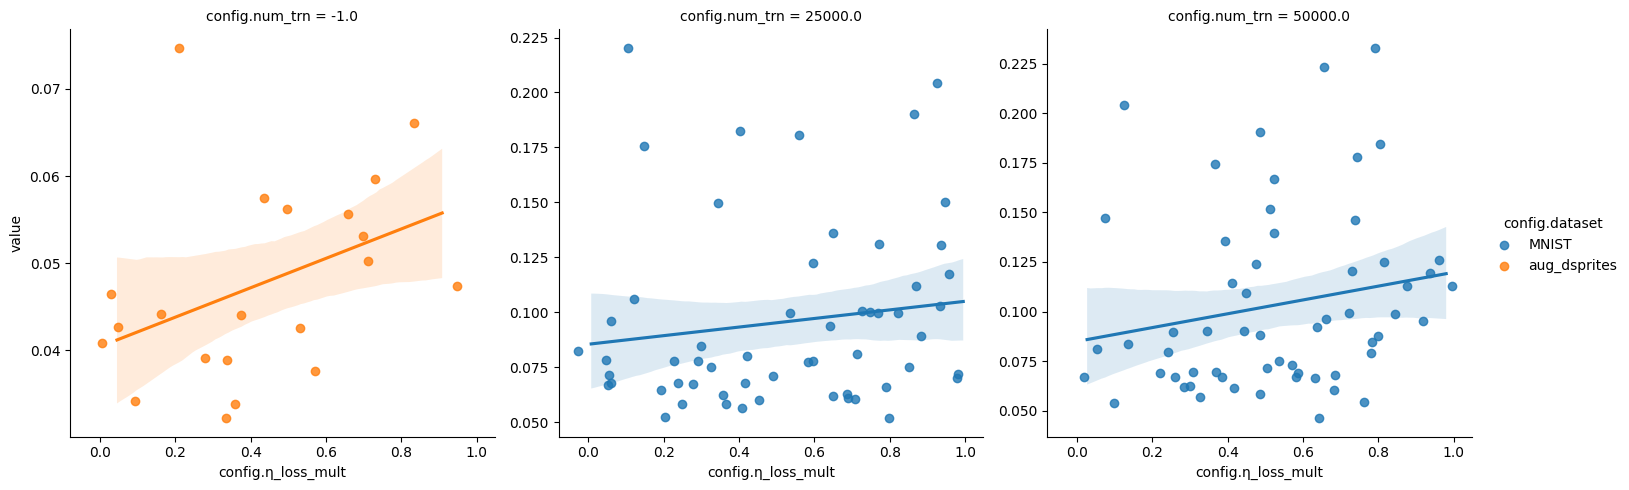

In [232]:
g = sns.lmplot(
    data=df[(df.metric == METRIC)],
    x="config.η_loss_mult",
    y="value",
    col="config.num_trn", hue='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    x_jitter=0.05,
    order=1
)

# g.set(yscale="log",)

g

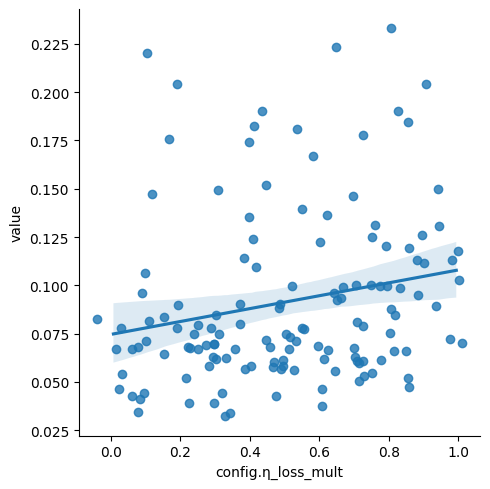

In [233]:
g = sns.lmplot(
    data=df[(df.metric == METRIC)],
    x="config.η_loss_mult",
    y="value",
    # hue='config.dataset', col='config.dataset',
    # kind="scatter",
    facet_kws={'sharex': True, 'sharey': False},
    x_jitter=0.05,
    order=1
    )

# g.set(yscale="log",)

g